In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn  as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
rate = pd.read_csv(r"C:\Users\NIRANKARI\Documents\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
le = LabelEncoder()
rate['Attrition'] = le.fit_transform(rate['Attrition'])

In [6]:
rate

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2        

In [7]:
rate.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Problem with data

In [8]:
# Imbalance Dataset

rate['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [7]:
# 1 is more than 0 so it is imbalance dataset, so in order to deal with this problem. we have to do oversampling 

# Skewness

In [9]:


rate.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

In [9]:
# in same colums skewness exist need to be removed 

# Missing Values 

In [10]:
rate.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#  Data Analysis

# Education Level of employees

<Axes: ylabel='EducationField'>

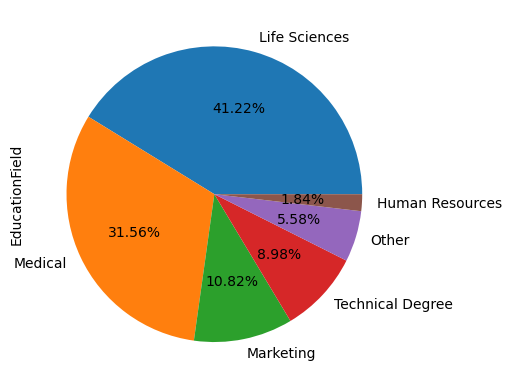

In [11]:
rate['EducationField'].value_counts().plot(kind='pie', autopct = '%2.2f%%')

# Environment Satisfaction

In [12]:
pd.crosstab(rate['JobSatisfaction'], rate['Attrition'])

Attrition          0   1
JobSatisfaction         
1                223  66
2                234  46
3                369  73
4                407  52

<Axes: xlabel='JobSatisfaction'>

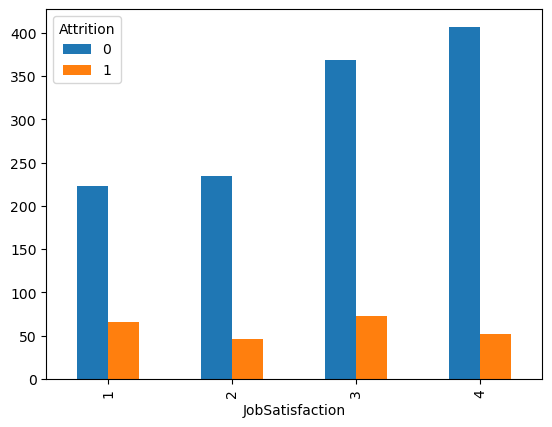

In [13]:
pd.crosstab(rate['JobSatisfaction'], rate['Attrition']).plot(kind='bar')

# # 237 employee left company out of 1470
# 66 employee with 1  rating left company 
# 46 employee with 2  rating left company 
# 73 employee with 3  rating left company 
# 52 employee with 4  rating left company 

#  Department

<Axes: ylabel='Department'>

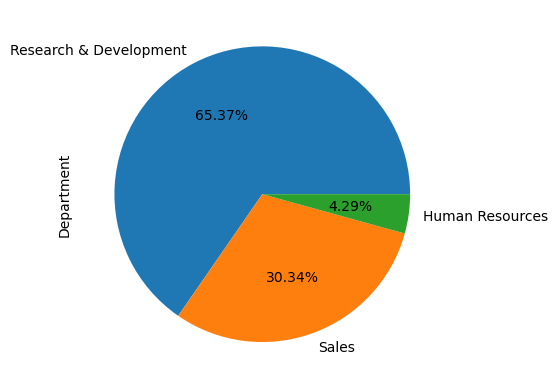

In [14]:
rate['Department'].value_counts().plot(kind='pie', autopct = '%2.2f%%')

# here  as per chart, as you can see 30.34% employees involved in sales 
# 65.37% employees invoved in research and devdelopment department
# only 4.29% employees in human resources

# Age of employees 

<Axes: xlabel='Age'>

<Figure size 1400x1200 with 0 Axes>

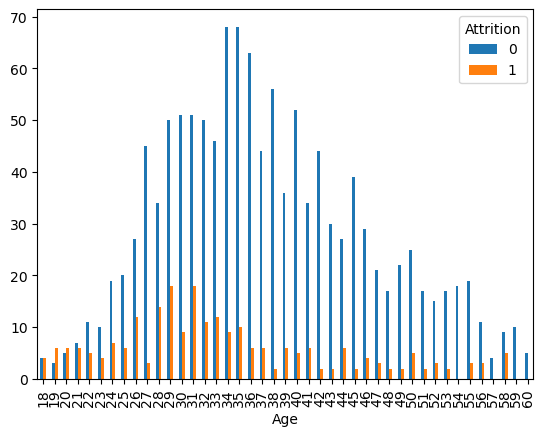

In [15]:
plt.figure(figsize=(14,12))
pd.crosstab(rate['Age'], rate['Attrition']).plot(kind='bar')

# employees left company between 28 and 35 is high 
# employe still working in company is higher than those company left
# attrition rate between 27 and 46 is high

# Work Life Balance

In [16]:
pd.crosstab(rate['WorkLifeBalance'], rate['Attrition'])

Attrition          0    1
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>], dtype=object)

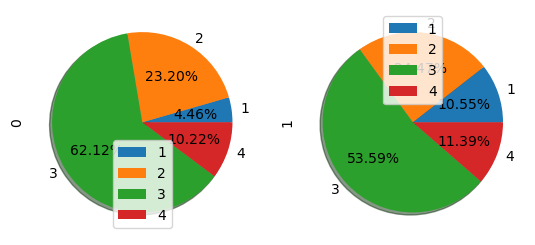

In [17]:
pd.crosstab(rate['WorkLifeBalance'], rate['Attrition']).plot(kind= 'pie', subplots=True, autopct = '%2.2f%%', shadow=True)

# 10.22 % of employees out of total employees, left with rating 4
# 11.39% of total employee left with ratinig 4
# attrition rate is 16.122 % from total employees including still working in company

# MaritalStatus

In [19]:
pd.crosstab(rate['MaritalStatus'], rate['Attrition'])

Attrition        0    1
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120

<Axes: xlabel='MaritalStatus'>

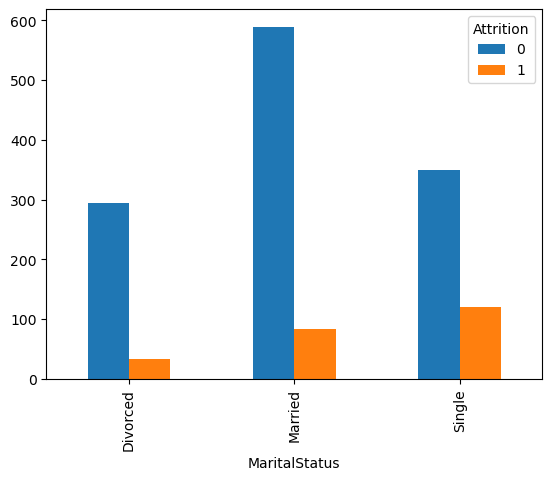

In [20]:
pd.crosstab(rate['MaritalStatus'], rate['Attrition']).plot(kind='bar')

# attrition rate is high in case of single employee
# attrition rate is less in case of married employee and Divorced employee as compare to single employees

# Job Involvement,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [21]:
pd.crosstab(rate['JobInvolvement'], rate['Attrition'])

Attrition         0    1
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13

<Axes: xlabel='JobInvolvement'>

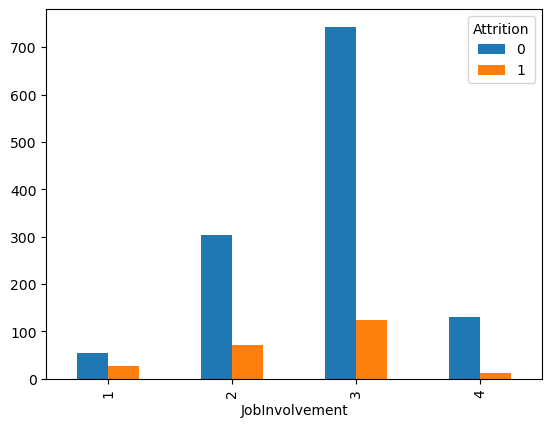

In [22]:
pd.crosstab(rate['JobInvolvement'], rate['Attrition']).plot(kind='bar')

# attrition rate is high where job involvement rating is 3 as compare to 1, 2, 4 


# Job Satisfaction

In [23]:
pd.crosstab(rate['JobSatisfaction'], rate['Attrition'])

Attrition          0   1
JobSatisfaction         
1                223  66
2                234  46
3                369  73
4                407  52

<Axes: xlabel='JobSatisfaction'>

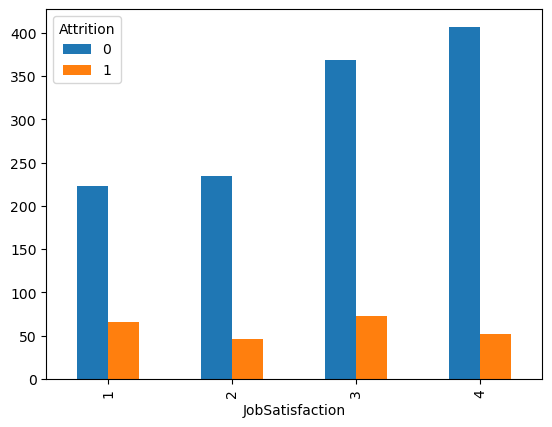

In [24]:
pd.crosstab(rate['JobSatisfaction'], rate['Attrition']).plot(kind='bar')

# attrition rate is where job satisfaction is 3 
# attrition rate is less where job satisfaction is 3
# in total 237 employees left which include rating 1,2,3,4 job satisfaction

# YearsInCurrentRole

In [25]:
pd.crosstab(rate['YearsInCurrentRole'], rate['Attrition'])

Attrition             0   1
YearsInCurrentRole         
0                   171  73
1                    46  11
2                   304  68
3                   119  16
4                    89  15
5                    35   1
6                    35   2
7                   191  31
8                    82   7
9                    61   6
10                   27   2
11                   22   0
12                    9   1
13                   13   1
14                   10   1
15                    6   2
16                    7   0
17                    4   0
18                    2   0

<Axes: xlabel='YearsInCurrentRole'>

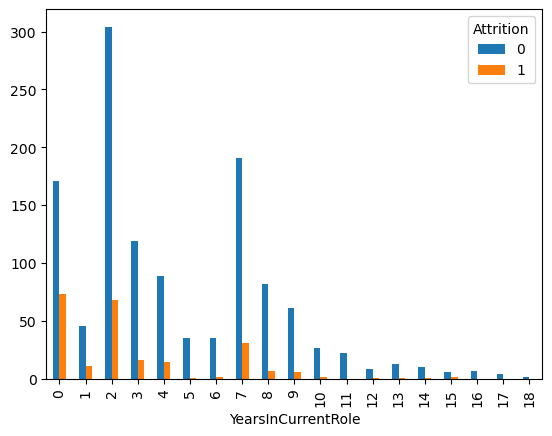

In [26]:
pd.crosstab(rate['YearsInCurrentRole'], rate['Attrition']).plot(kind='bar')

# Attrition rate is high between 0 to 2 years  and in 7th year
# Attrition rate is low between 9 to 18 years  and in 7th year

# Years Since Last Promotion

<Axes: xlabel='YearsSinceLastPromotion', ylabel='Attrition'>

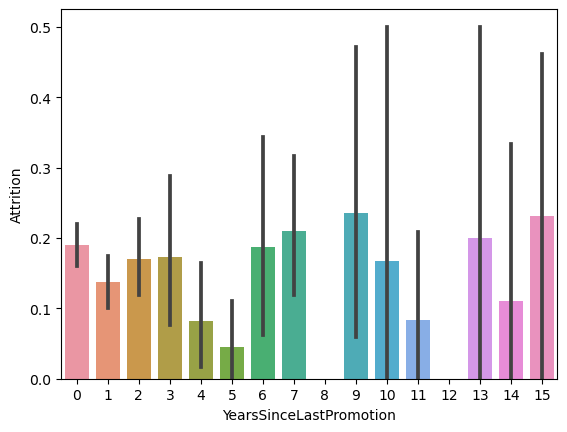

In [27]:
sns.barplot(data=rate, x='YearsSinceLastPromotion', y='Attrition')

# attrition rate is higher in year of 7, 9 and 15
# attrition rate is lower in year of 5, 11 14 and 4

# Monthly Income

<Axes: xlabel='Age'>

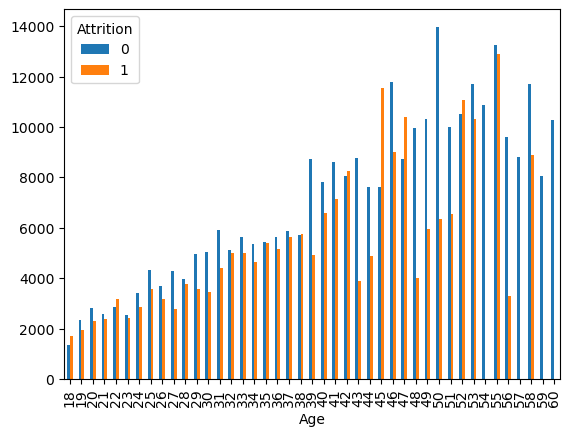

In [28]:

rate.pivot_table(index='Age', columns='Attrition', values='MonthlyIncome').plot(kind='bar')

# attration rate is low when employees age between 18 and 25 
# attrition rate is high between 45 and 47, 55

# Years With CurrManager

<Axes: >

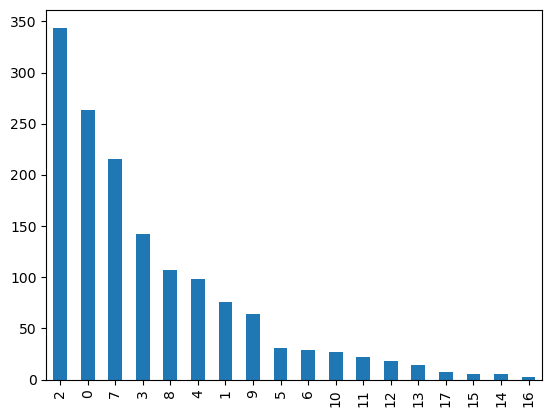

In [29]:
rate['YearsWithCurrManager'].value_counts().plot(kind='bar')

In [30]:
# 

In [31]:
pd.crosstab(rate['RelationshipSatisfaction'], rate['Attrition'])

Attrition                   0   1
RelationshipSatisfaction         
1                         219  57
2                         258  45
3                         388  71
4                         368  64

<Axes: xlabel='RelationshipSatisfaction'>

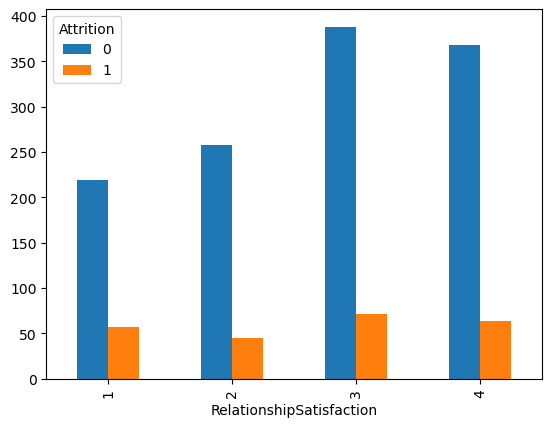

In [32]:
pd.crosstab(rate['RelationshipSatisfaction'], rate['Attrition']).plot(kind='bar')

# Attrition rate is high when Relationship statisfcation is 3
# 237 employee left out of 1470

-# MonthlyIncome vs Job Role

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

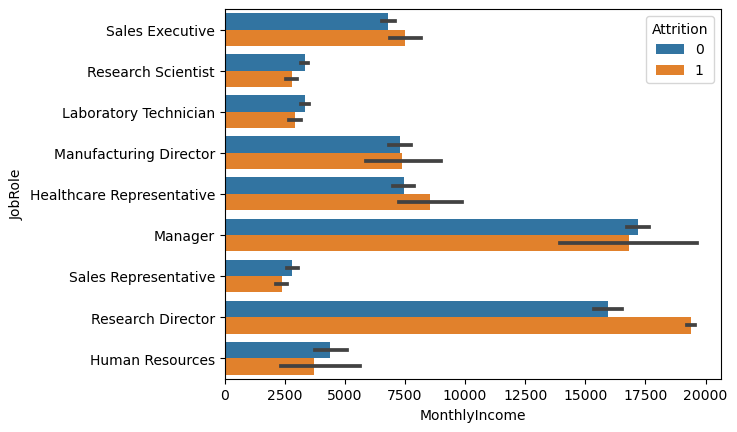

In [33]:
sns.barplot(data=rate, x='MonthlyIncome', y='JobRole', hue='Attrition')

# attrition rate is higher in case of job role of Manager and research Director 
# Attrition  rate is low in case of Research scientist, sale representative and labortory Technician

In [19]:
rate2 = rate.drop(['EmployeeNumber','StandardHours','Over18','EmployeeCount'], axis=1)

#  1) Outliers Detection AND Removal

In [20]:
rate2.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count      1470.000000  ...        1470.000000               1470.000000   
mean          2.728571  ...           3.153741                  2.712245   
std           1.102846  ...           0.360824                  1.081209   
min           1.000000  ...           3.000000                  1.000000   
25%           2.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           4.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 24 columns]

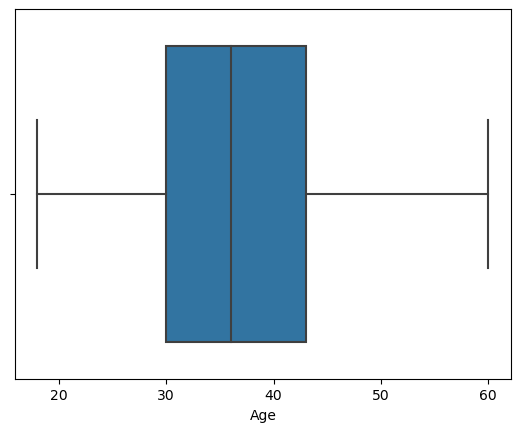

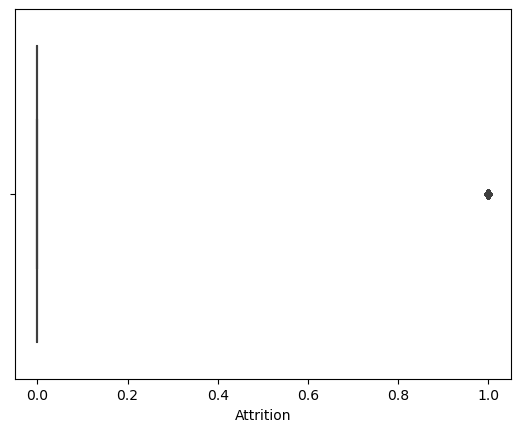

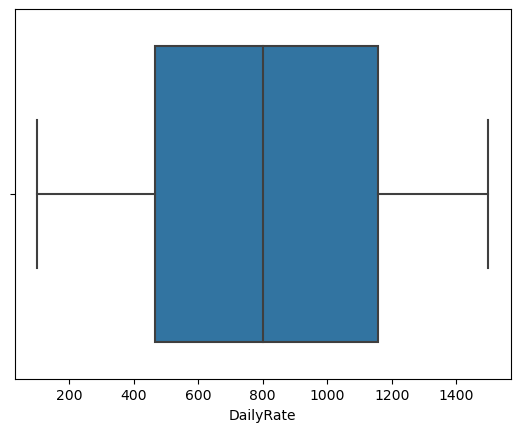

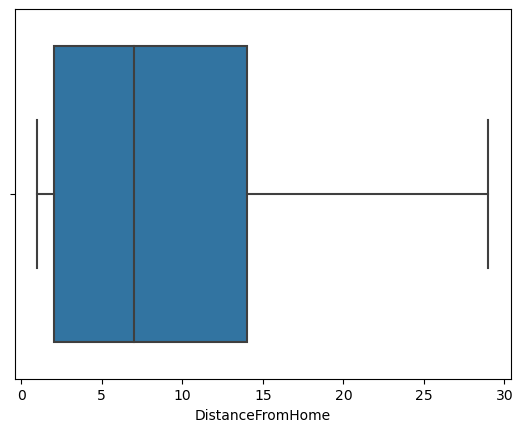

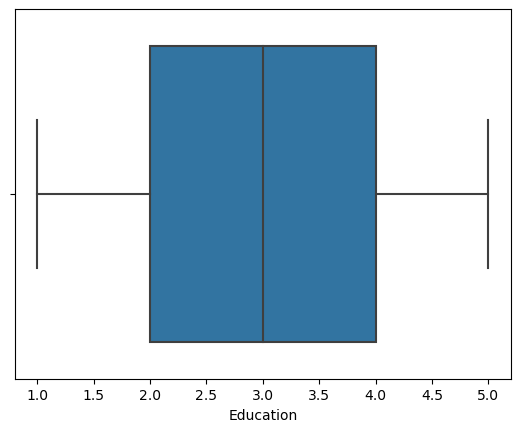

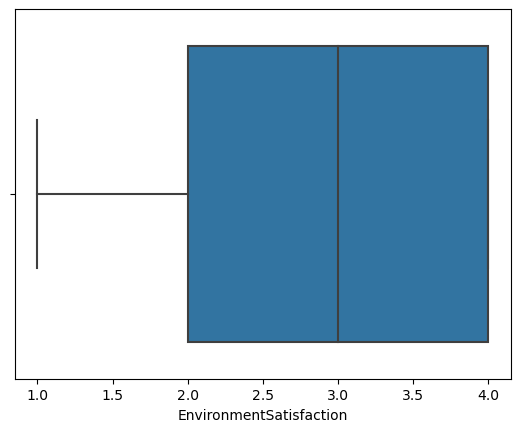

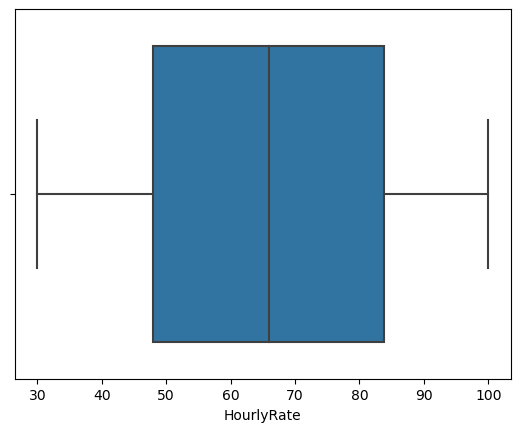

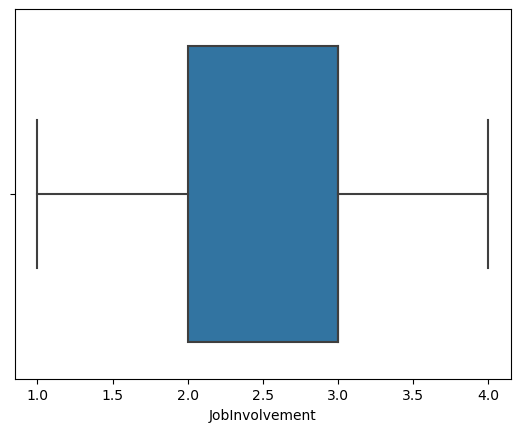

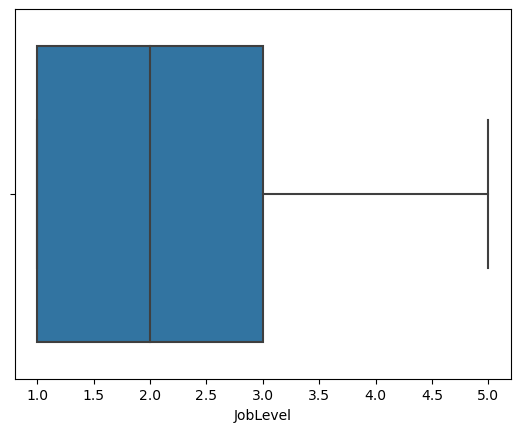

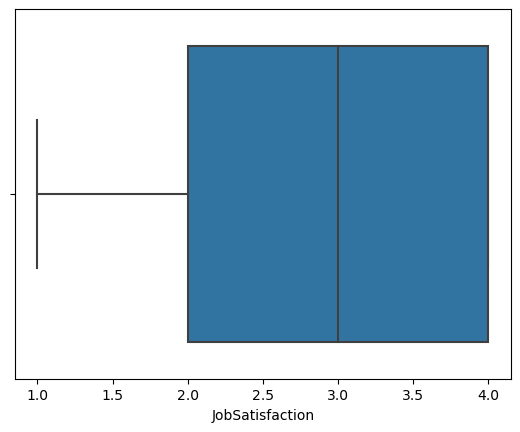

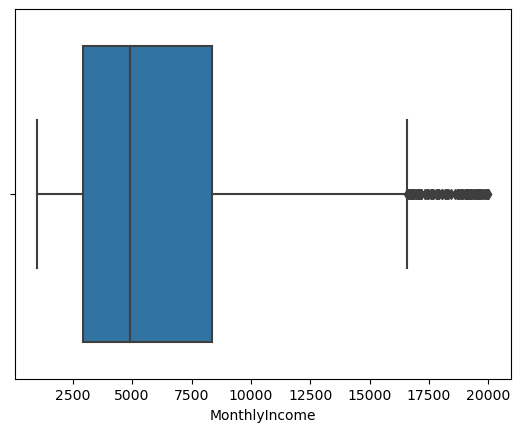

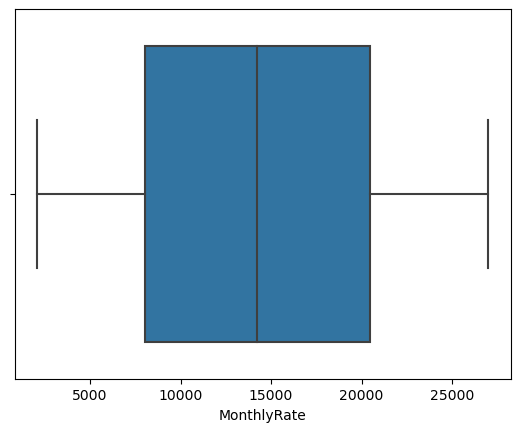

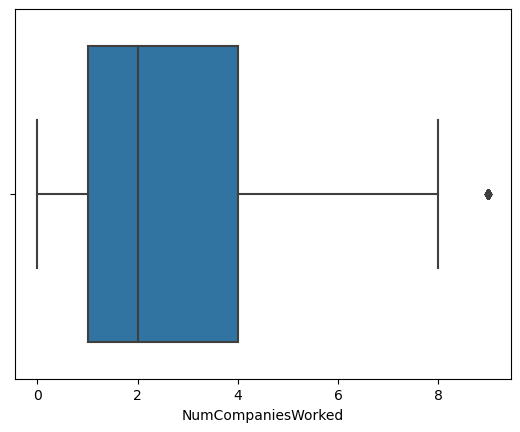

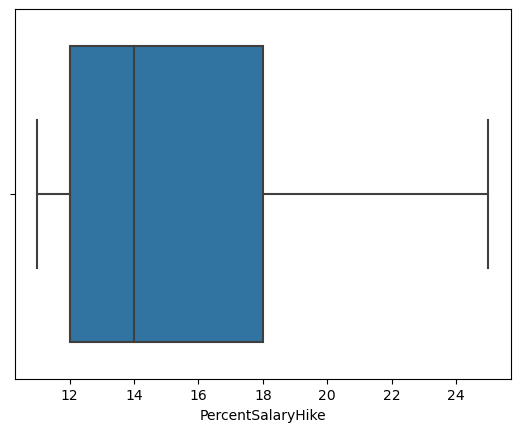

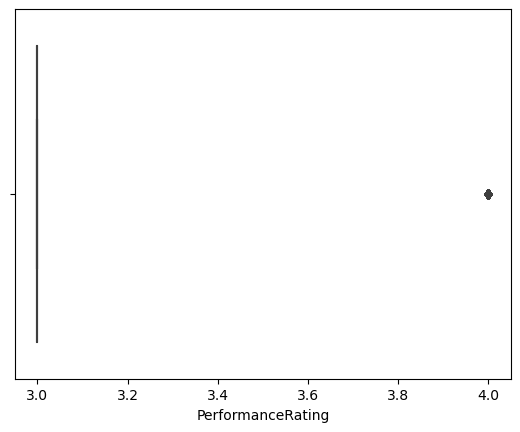

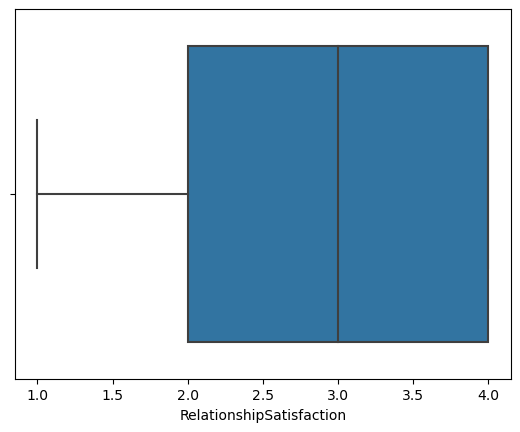

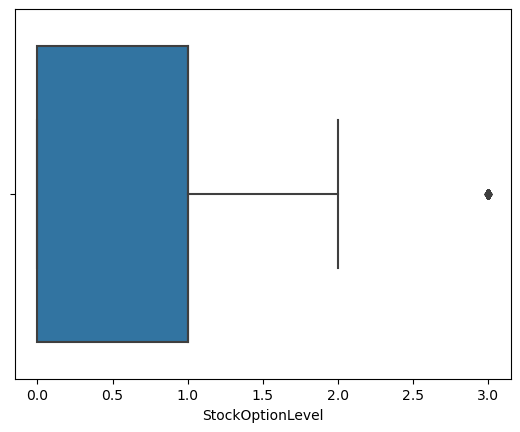

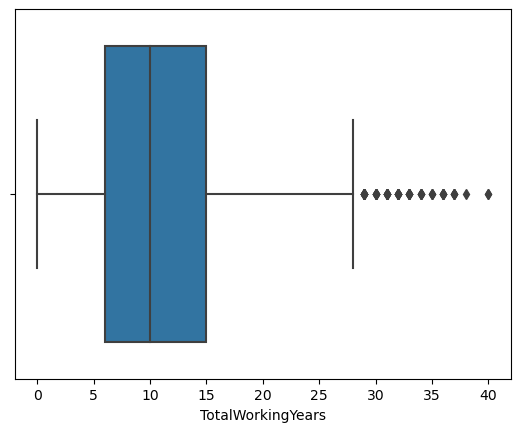

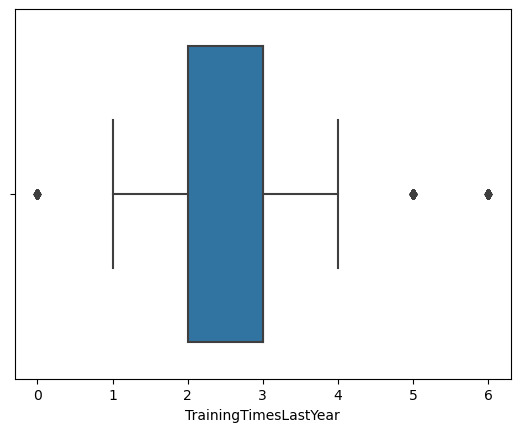

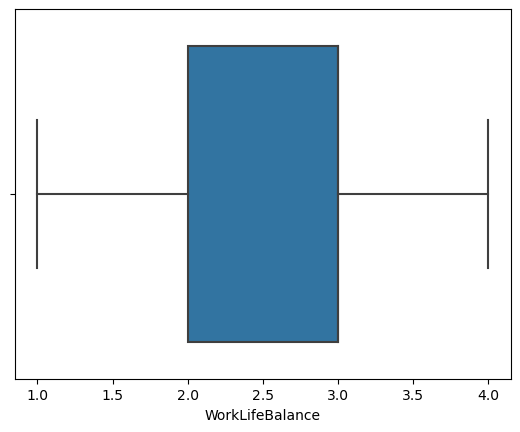

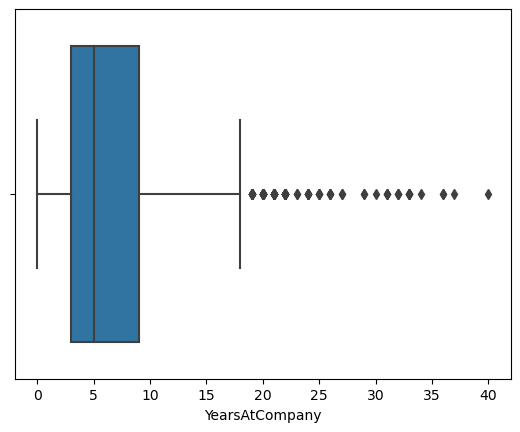

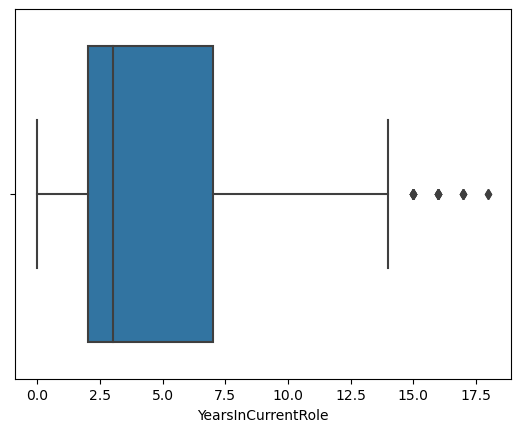

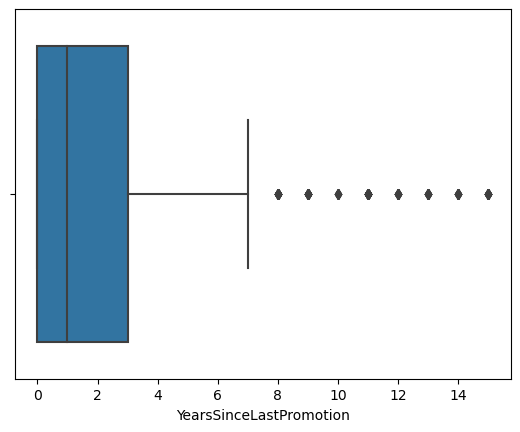

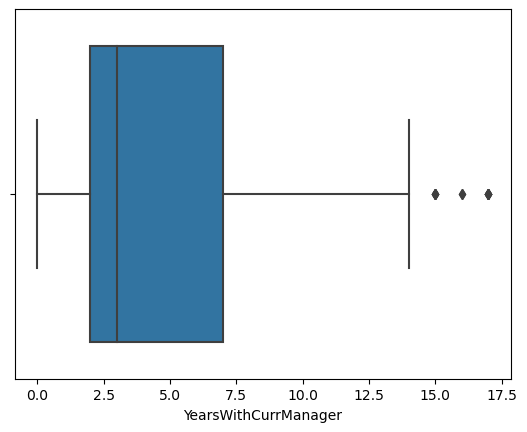

In [21]:
for i in rate2.columns:
    if rate2[i].dtype != 'object':
        sns.boxplot(data=rate2, x=i)
        plt.show()
        
    

In [22]:
Upper = []
Lower = []
for i in rate2.columns:
    if rate2[i].dtype !='object':
        q75 = rate2[i].quantile(0.75)
        q25 = rate2[i].quantile(0.25)
        iqr = q75 - q25
        upper = q75 + (1.5*iqr)
        lower = q25 - (1.5*iqr)
        print(',,,,,,,,,,')
        print(i)
        print(',,,,,,,,,,,,,,')
        print("upper", upper)
        print("lower", lower)
        print(',,,,,,,,,')
        Upper.append(upper)
        Lower.append(lower)

,,,,,,,,,,
Age
,,,,,,,,,,,,,,
upper 62.5
lower 10.5
,,,,,,,,,
,,,,,,,,,,
Attrition
,,,,,,,,,,,,,,
upper 0.0
lower 0.0
,,,,,,,,,
,,,,,,,,,,
DailyRate
,,,,,,,,,,,,,,
upper 2195.0
lower -573.0
,,,,,,,,,
,,,,,,,,,,
DistanceFromHome
,,,,,,,,,,,,,,
upper 32.0
lower -16.0
,,,,,,,,,
,,,,,,,,,,
Education
,,,,,,,,,,,,,,
upper 7.0
lower -1.0
,,,,,,,,,
,,,,,,,,,,
EnvironmentSatisfaction
,,,,,,,,,,,,,,
upper 7.0
lower -1.0
,,,,,,,,,
,,,,,,,,,,
HourlyRate
,,,,,,,,,,,,,,
upper 137.375
lower -5.625
,,,,,,,,,
,,,,,,,,,,
JobInvolvement
,,,,,,,,,,,,,,
upper 4.5
lower 0.5
,,,,,,,,,
,,,,,,,,,,
JobLevel
,,,,,,,,,,,,,,
upper 6.0
lower -2.0
,,,,,,,,,
,,,,,,,,,,
JobSatisfaction
,,,,,,,,,,,,,,
upper 7.0
lower -1.0
,,,,,,,,,
,,,,,,,,,,
MonthlyIncome
,,,,,,,,,,,,,,
upper 16581.0
lower -5291.0
,,,,,,,,,
,,,,,,,,,,
MonthlyRate
,,,,,,,,,,,,,,
upper 39083.25
lower -10574.75
,,,,,,,,,
,,,,,,,,,,
NumCompaniesWorked
,,,,,,,,,,,,,,
upper 8.5
lower -3.5
,,,,,,,,,
,,,,,,,,,,
PercentSalaryHike
,,,,,,,,,,,,,,
upper 27.0
lowe

In [23]:
Rate = rate2[(rate2['YearsWithCurrManager'] <= 14.5) ]
Rate2 = Rate[(Rate['YearsSinceLastPromotion'] <= 7.5)]
Rate3 = Rate2[(Rate2['YearsInCurrentRole'] <= 14.5)]
Rate4 = Rate3[(Rate3['YearsAtCompany'] <= 18.0)]
Rate5 = Rate4[(Rate4['TrainingTimesLastYear'] <= 4.5)]
Rate6 = Rate5[(Rate5['TrainingTimesLastYear'] >= 0.5)]
Rate7 = Rate6[(Rate6['TotalWorkingYears'] <= 28.5)]
Rate8 = Rate7[(Rate7['TotalWorkingYears'] >= -7.5)]
Rate9 = Rate8[(Rate8['StockOptionLevel'] <= 2.5)]
Rate10 = Rate9[(Rate9['NumCompaniesWorked'] <= 8.5)]
Rate11 = Rate10[(Rate10['MonthlyIncome'] <= 16581.0)]

In [24]:
Rate11.describe()

Age   Attrition    DailyRate  DistanceFromHome   Education  \
count  925.000000  925.000000   925.000000        925.000000  925.000000   
mean    35.416216    0.176216   799.051892          9.331892    2.891892   
std      8.628501    0.381210   402.137500          8.143937    1.023104   
min     18.000000    0.000000   103.000000          1.000000    1.000000   
25%     29.000000    0.000000   461.000000          2.000000    2.000000   
50%     34.000000    0.000000   802.000000          7.000000    3.000000   
75%     40.000000    0.000000  1157.000000         14.000000    4.000000   
max     60.000000    1.000000  1498.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               925.000000  925.000000      925.000000  925.000000   
mean                  2.727568   65.976216        2.739459    1.743784   
std                   1.084796   20.475978        0.711843    0.754694   
min                   1.000000   30.000000        1.000000    1.000000   
25%                   2.000000   48.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    2.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    4.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count       925.000000  ...         925.000000                925.000000   
mean          2.712432  ...           3.157838                  2.684324   
std           1.111484  ...           0.364786                  1.086030   
min           1.000000  ...           3.000000                  1.000000   
25%           2.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           4.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        925.000000         925.000000             925.000000   
mean           0.672432           9.007568               2.523243   
std            0.688297           5.252390               0.746384   
min            0.000000           0.000000               1.000000   
25%            0.000000           5.000000               2.000000   
50%            1.000000           9.000000               2.000000   
75%            1.000000          12.000000               3.000000   
max            2.000000          28.000000               4.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       925.000000      925.000000          925.000000   
mean          2.753514        5.429189            3.589189   
std           0.723598        3.681093            3.049713   
min           1.000000        0.000000            0.000000   
25%           2.000000        2.000000            2.000000   
50%           3.000000        5.000000            2.000000   
75%           3.000000        8.000000            7.000000   
max           4.000000       18.000000           14.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               925.000000            925.000000  
mean                  1.417297              3.547027  
std                   1.970816              3.041773  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              2.000000  
75%                   2.000000              7.000000  
max                   7.000000             13.000000  

[8 rows x 24 columns]

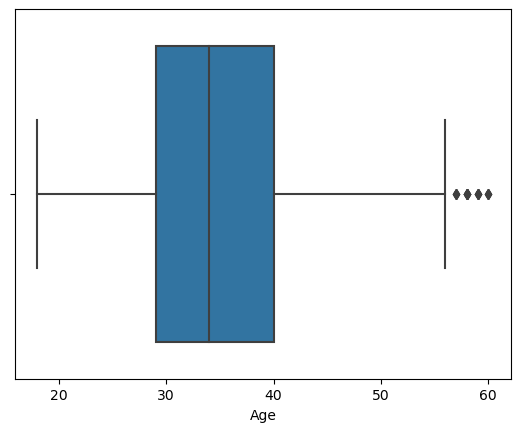

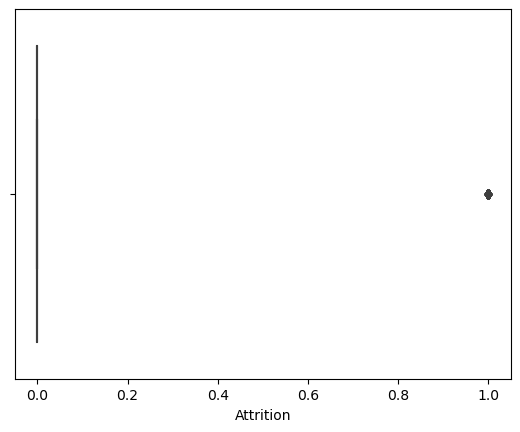

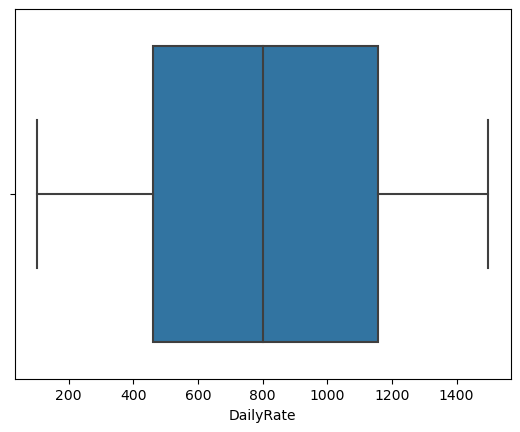

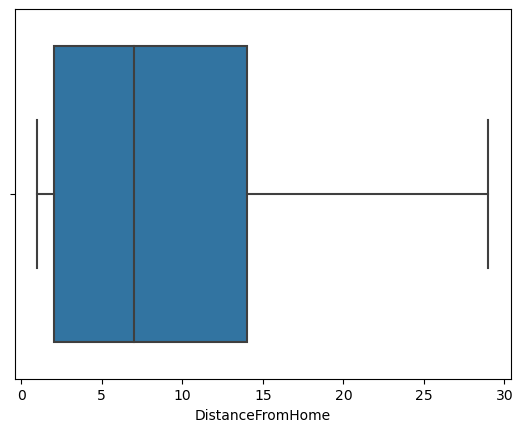

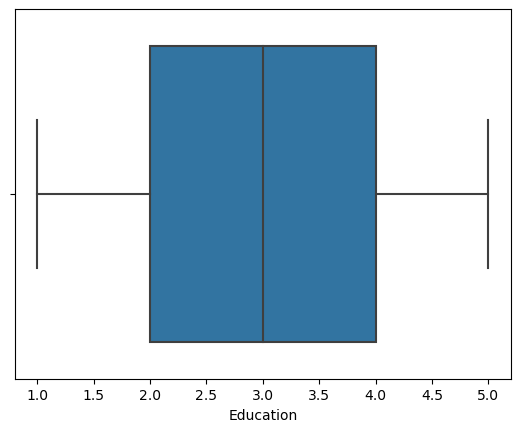

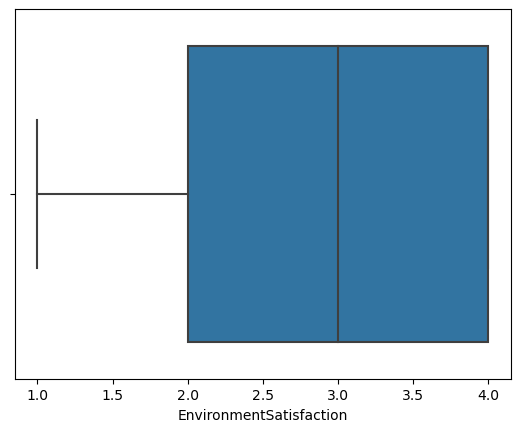

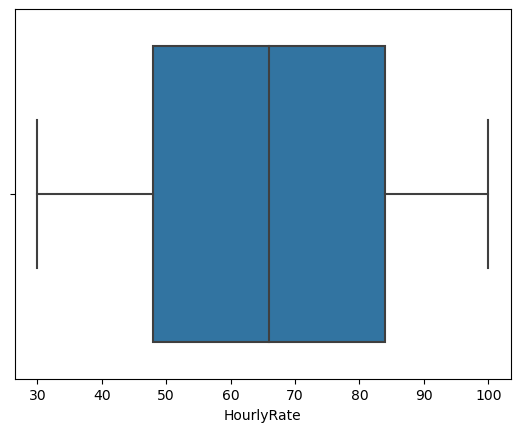

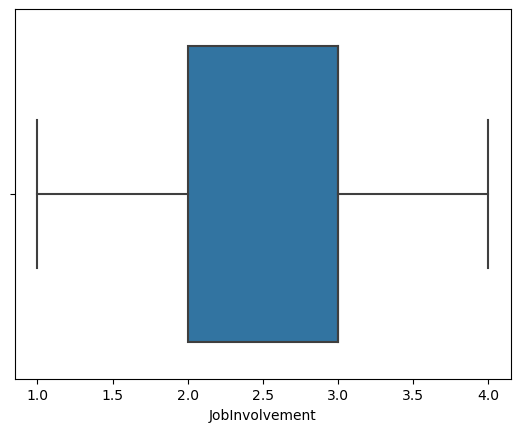

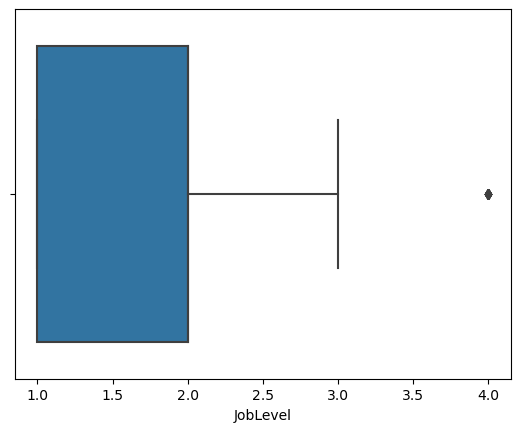

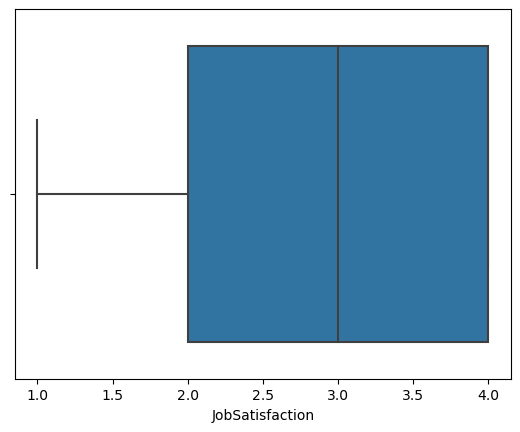

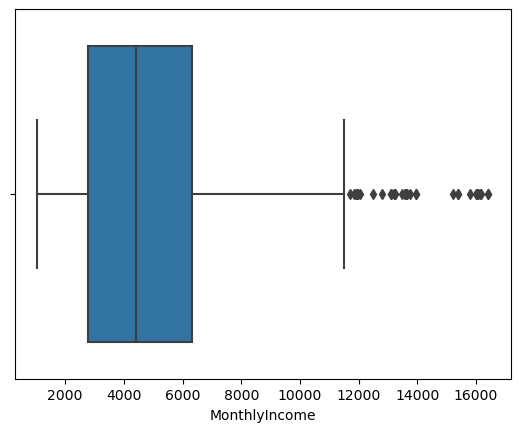

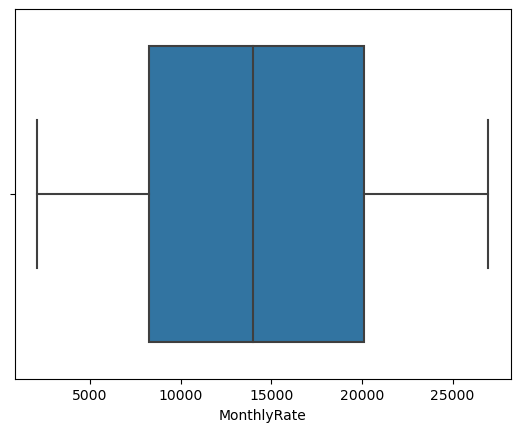

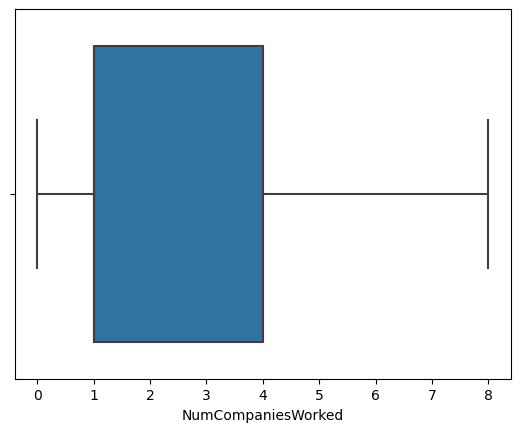

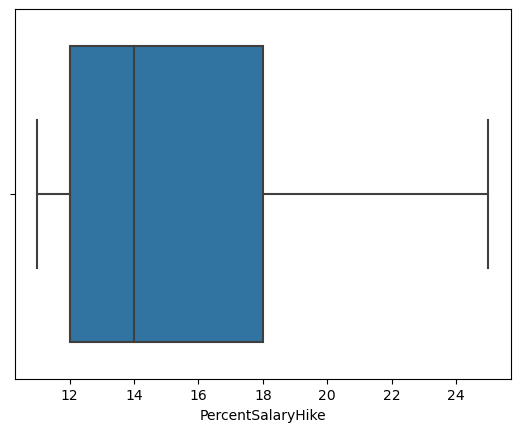

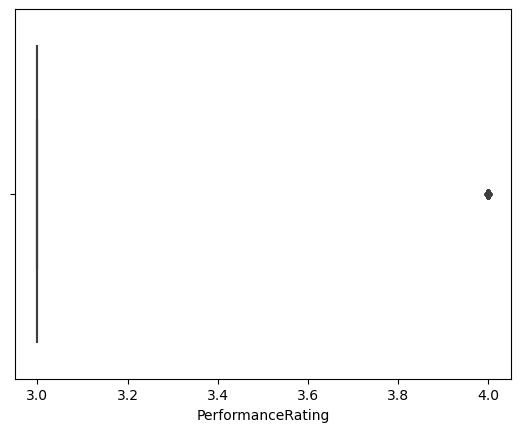

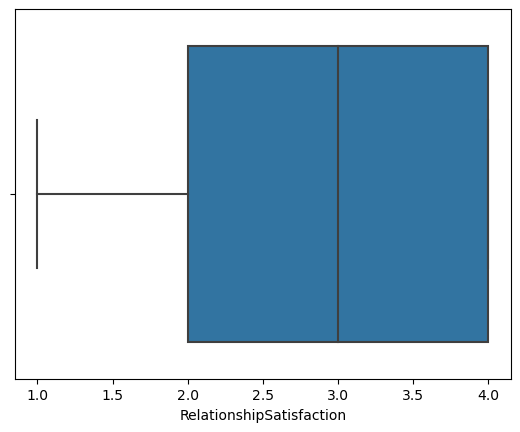

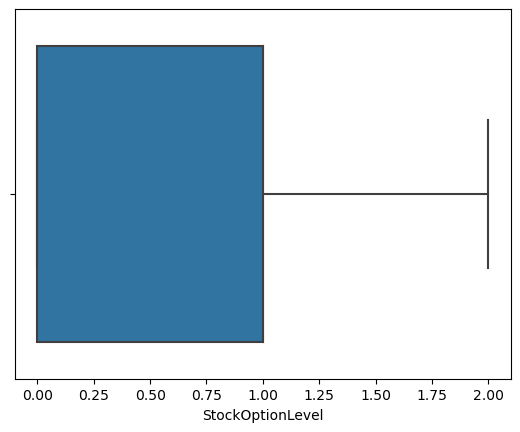

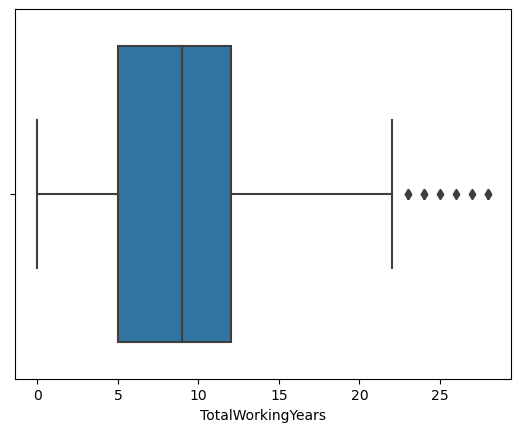

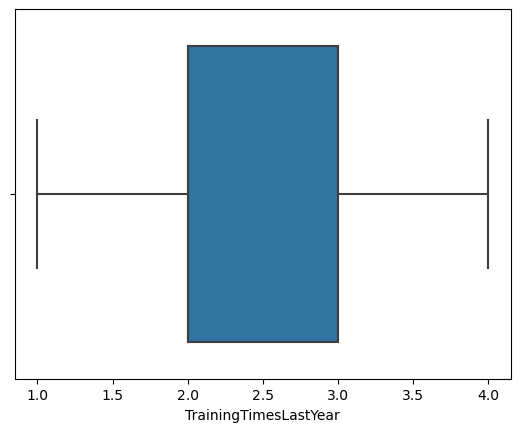

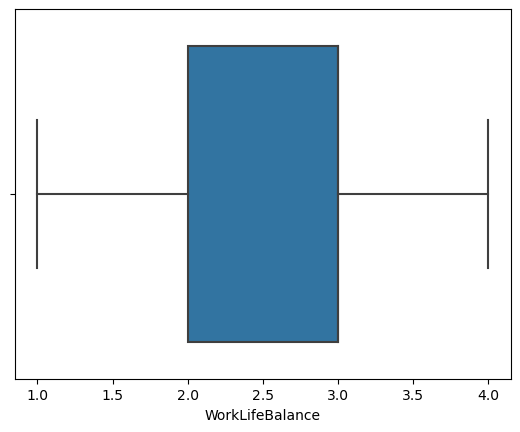

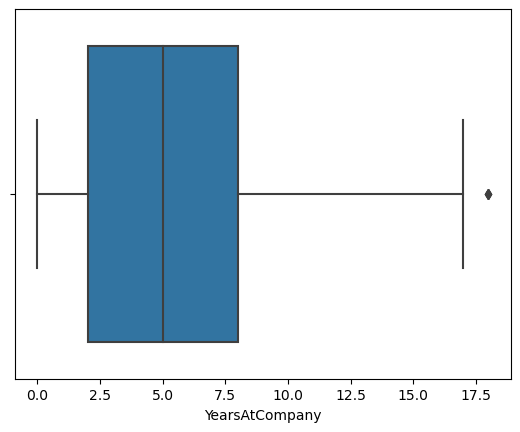

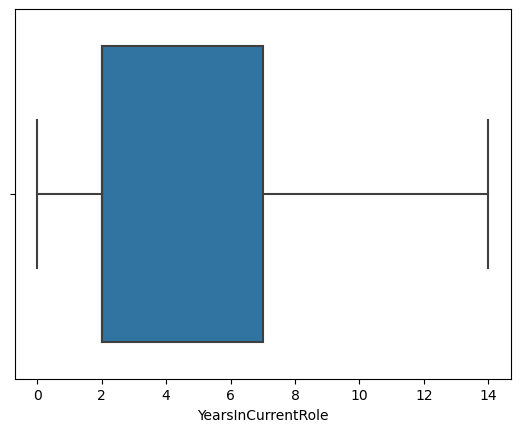

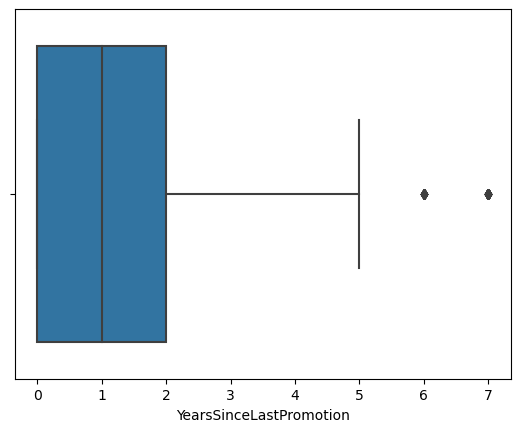

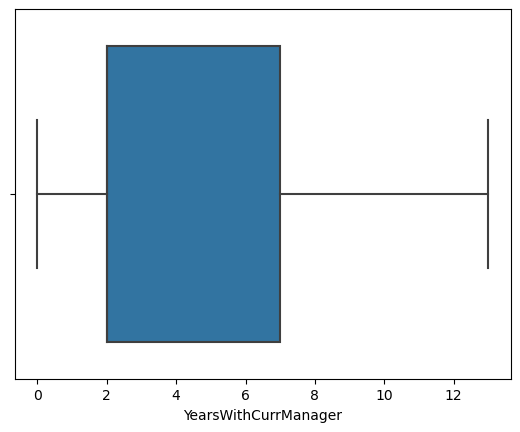

In [25]:
for i in Rate11.columns:
    if Rate11[i].dtype != 'object':
        sns.boxplot(data=Rate11, x=i)
        plt.show()
        

# Loss of Data

In [41]:
Rate11.shape

(925, 31)

In [42]:
rate2.shape

(1470, 31)

In [43]:
545/1470*100

37.07482993197279

# Seprating of input and Output

In [26]:
x = Rate11.drop(['Attrition'], axis=1)

In [27]:
y = Rate11['Attrition']

# 2) Encoding Through One Hot Encoding

In [28]:
column = ColumnTransformer([
    
    ('OverTime', OneHotEncoder(drop='first', sparse=False), ['OverTime']),
    ('MaritalStatus', OneHotEncoder(drop='first', sparse=False), ['MaritalStatus']),
    ('JobRole', OneHotEncoder(drop='first', sparse=False), ['JobRole']),
    ('Gender', OneHotEncoder(drop='first', sparse=False), ['Gender']),
    ('EducationField', OneHotEncoder(drop='first', sparse=False), ['EducationField']),
    ('Department', OneHotEncoder(drop='first', sparse=False), ['Department']),
    ('BusinessTravel', OneHotEncoder(drop='first', sparse=False), ['BusinessTravel'])
], remainder = 'passthrough')

In [29]:
Rate11.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
Rates = pd.DataFrame(column.fit_transform(Rate11))

In [31]:
Rates

0    1    2    3    4    5    6    7    8    9   ...   35   36   37  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  4.0  4.0  1.0   
1    1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  2.0  0.0   
2    1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  3.0  3.0  0.0   
3    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  3.0  0.0   
4    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  2.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
920  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  3.0  2.0  0.0   
921  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  4.0  0.0   
922  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  3.0  1.0   
923  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  3.0  4.0  0.0   
924  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  3.0  1.0  0.0   

       38   39   40    41   42   43   44  
0    10.0  3.0  3.0  10.0  7.0  1.0  7.0  
1     7.0  3.0  3.0   0.0  0.0  0.0  0.0  
2     8.0  3.0  3.0   8.0  7.0  3.0  0.0  
3     8.0  2.0  2.0   7.0  7.0  3.0  6.0  
4     1.0  2.0  3.0   1.0  0.0  0.0  0.0  
..    ...  ...  ...   ...  ...  ...  ...  
920  10.0  2.0  3.0   9.0  4.0  1.0  7.0  
921   5.0  2.0  3.0   4.0  2.0  0.0  0.0  
922  17.0  3.0  3.0   5.0  2.0  0.0  3.0  
923  17.0  3.0  2.0   9.0  6.0  0.0  8.0  
924   6.0  3.0  4.0   4.0  3.0  1.0  2.0  

[925 rows x 45 columns]

# 3) Skewness check

In [32]:
Rates.skew()

0     0.905501
1     0.149849
2     0.658863
3     4.563934
4     1.536695
5     9.020351
6     2.661010
7     6.588843
8     1.298024
9     1.233505
10    3.273688
11   -0.488162
12    0.326955
13    2.390719
14    0.987542
15    3.400728
16    2.701408
17   -0.594092
18    0.794449
19    1.554148
20   -0.940187
21    0.575953
22    1.702396
23   -0.005741
24    0.911890
25   -0.298916
26   -0.330171
27   -0.040909
28   -0.513207
29    0.719319
30   -0.310596
31    1.348931
32    0.071683
33    0.977630
34    0.754216
35    1.880025
36   -0.263171
37    0.531143
38    0.794230
39    0.155124
40   -0.550773
41    0.704519
42    0.804502
43    1.658848
44    0.716983
dtype: float64

# Transformer through PowerTransformer

# Suare Root Transformer

In [33]:
x = np.sqrt(Rates)

In [34]:
x

0    1    2    3    4    5    6    7    8    9   ...        35  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  2.000000   
1    1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.732051   
2    1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.732051   
3    0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.732051   
4    0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  2.000000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
920  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.732051   
921  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.732051   
922  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.732051   
923  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.732051   
924  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.732051   

           36   37        38        39        40        41        42  \
0    2.000000  1.0  3.162278  1.732051  1.732051  3.162278  2.645751   
1    1.414214  0.0  2.645751  1.732051  1.732051  0.000000  0.000000   
2    1.732051  0.0  2.828427  1.732051  1.732051  2.828427  2.645751   
3    1.732051  0.0  2.828427  1.414214  1.414214  2.645751  2.645751   
4    1.414214  1.0  1.000000  1.414214  1.732051  1.000000  0.000000   
..        ...  ...       ...       ...       ...       ...       ...   
920  1.414214  0.0  3.162278  1.414214  1.732051  3.000000  2.000000   
921  2.000000  0.0  2.236068  1.414214  1.732051  2.000000  1.414214   
922  1.732051  1.0  4.123106  1.732051  1.732051  2.236068  1.414214   
923  2.000000  0.0  4.123106  1.732051  1.414214  3.000000  2.449490   
924  1.000000  0.0  2.449490  1.732051  2.000000  2.000000  1.732051   

           43        44  
0    1.000000  2.645751  
1    0.000000  0.000000  
2    1.732051  0.000000  
3    1.732051  2.449490  
4    0.000000  0.000000  
..        ...       ...  
920  1.000000  2.645751  
921  0.000000  0.000000  
922  0.000000  1.732051  
923  0.000000  2.828427  
924  1.000000  1.414214  

[925 rows x 45 columns]

In [35]:
X_transform1 = x.skew()
skewed = X_transform1[abs(X_transform1) > .50] 
skewed

0     0.905501
2     0.658863
3     4.563934
4     1.536695
5     9.020351
6     2.661010
7     6.588843
8     1.298024
9     1.233505
10    3.273688
13    2.390719
14    0.987542
15    3.400728
16    2.701408
17   -0.594092
18    0.794449
19    1.554148
20   -0.940187
22    1.702396
25   -0.694443
26   -0.583841
28   -0.984261
30   -0.546545
31    0.734522
34    0.588664
35    1.880025
36   -0.518056
40   -1.023813
43    0.591157
dtype: float64

# Principal Compenent Analysis

In [36]:
pw = PCA(n_components=40)

In [37]:
X_transform = pd.DataFrame(pw.fit_transform(x))

In [38]:
X_transform.skew()

0     0.316898
1     0.723011
2     0.402939
3     0.239832
4     0.190506
5     0.146450
6     0.178267
7     0.517480
8     0.284524
9     0.085295
10    0.036269
11   -0.054279
12    0.981569
13    0.237227
14    0.332323
15    0.628837
16    0.037300
17    0.305400
18   -0.016521
19    0.060810
20    0.377411
21    0.156342
22   -0.056461
23    0.187801
24    0.493974
25    0.295018
26    0.182431
27    0.040596
28   -0.086519
29    0.161390
30    0.808076
31    0.669507
32    0.059353
33    0.646549
34    0.463297
35    1.432293
36    0.322290
37   -0.748635
38    0.050317
39   -0.363662
dtype: float64

# Power Transformer

In [39]:
pt = PowerTransformer()

X_transformed = pd.DataFrame(pt.fit_transform(X_transform))

In [40]:
X_transformed

0         1         2         3         4         5         6   \
0   -1.484579  0.230833  1.218068 -1.241873  0.065320 -0.034893  0.646520   
1    1.914855 -1.153358 -1.305775  1.724276 -0.066508 -1.370807  1.222471   
2   -1.224251 -0.894890 -1.605735 -0.554754 -0.832930 -0.067301  0.287622   
3    0.306406 -0.654271 -0.555374 -1.360129 -0.412190 -1.151158 -0.827647   
4    0.118927 -0.929159 -1.431324  1.523992  1.294164  0.984349 -0.750211   
..        ...       ...       ...       ...       ...       ...       ...   
920  1.518077  1.555044  1.304893 -0.185535 -0.130680 -0.569614 -1.723704   
921 -0.999889 -0.846417 -1.052538  0.562942 -1.564027  1.509737 -1.445600   
922  0.255638 -0.998996 -0.270900 -0.362794  0.780038  1.842120  1.787063   
923  0.097293  0.426056 -0.558295 -0.934187 -0.787979 -0.563861  0.794422   
924  0.508115  0.089829  0.417369  0.155722  0.539396 -0.622507 -0.016988   

           7         8         9   ...        30        31        32  \
0   -0.300606 -0.718773  1.017279  ...  0.171396 -0.908909 -0.098690   
1   -0.202285  1.275761 -0.798635  ...  2.246334 -1.414183  0.071453   
2   -0.205209 -0.451970 -1.197326  ... -0.977702 -0.432696  0.268502   
3   -1.242315  0.873597 -0.651240  ... -0.208002  1.098962 -0.203193   
4   -0.787068 -1.004284  0.425199  ...  0.007341  0.349025  0.397157   
..        ...       ...       ...  ...       ...       ...       ...   
920 -2.894558  0.717334  0.197765  ... -0.659740  0.108417 -0.786714   
921  0.765054  0.827850  0.316812  ...  1.454616 -2.412097 -3.027785   
922  0.222870 -0.096711  1.455463  ... -0.516612 -0.345069  1.163701   
923  1.443836  1.042605  1.440775  ...  0.824435 -0.083250 -0.787771   
924 -0.662815 -0.344156 -0.182786  ... -1.121372 -0.601754  1.246689   

           33        34        35        36        37        38        39  
0   -0.313534  1.291488 -0.995813  0.004694  0.083346  0.251574 -1.642834  
1   -0.320287  0.107773 -0.000750 -1.147713 -0.616566 -0.330218  0.070126  
2   -0.129109  0.468730  0.650920  1.778998  0.287122 -0.231809  0.182477  
3    0.641569 -0.725363 -0.757833  0.421449  0.070621 -0.536857  0.526837  
4   -1.093306 -0.429832  0.248207  1.554062  0.412627 -0.317671  0.008648  
..        ...       ...       ...       ...       ...       ...       ...  
920 -0.192948 -0.380715  1.647815 -1.783529  3.713481 -0.921986  2.380359  
921  0.153912 -1.065052 -0.267152 -0.178881  0.589668 -0.463512  0.480592  
922 -0.475353 -0.874165 -0.428163 -0.215673 -0.902934  0.331515 -2.191487  
923  1.079024  0.783304  0.302264  2.234328 -0.709238 -0.561343 -0.123615  
924 -1.416819 -0.633647  1.029893  1.559294  0.760430  0.880414 -2.037311  

[925 rows x 40 columns]

In [41]:
X_transformed.skew()

0     0.072169
1     0.117868
2     0.079420
3    -0.011400
4     0.005880
5     0.020606
6     0.016919
7     0.062417
8     0.026200
9    -0.002371
10    0.007906
11   -0.014076
12    0.184838
13    0.005618
14    0.049565
15    0.050666
16    0.006187
17    0.002343
18    0.004951
19    0.014439
20    0.007889
21    0.001657
22    0.013444
23    0.002284
24    0.004346
25   -0.015701
26    0.000459
27    0.009175
28    0.001942
29   -0.029228
30   -0.061091
31   -0.046563
32    0.003537
33   -0.030817
34   -0.005051
35   -0.021343
36   -0.024668
37    0.138288
38   -0.026711
39    0.018360
dtype: float64

# as you can see obove problem of skewness do not exists anymore

# 4) Multicollinearity check 

In [42]:
matrix = X_transformed.corr()
matrix

0         1         2         3         4         5         6   \
0   1.000000  0.006401  0.003621  0.002040  0.002178 -0.003411  0.000057   
1   0.006401  1.000000  0.001229 -0.048589 -0.004092  0.002468  0.013979   
2   0.003621  0.001229  1.000000 -0.006705 -0.000672 -0.008964 -0.001688   
3   0.002040 -0.048589 -0.006705  1.000000  0.002497 -0.000455 -0.013323   
4   0.002178 -0.004092 -0.000672  0.002497  1.000000 -0.009120 -0.002425   
5  -0.003411  0.002468 -0.008964 -0.000455 -0.009120  1.000000  0.000619   
6   0.000057  0.013979 -0.001688 -0.013323 -0.002425  0.000619  1.000000   
7   0.003104 -0.021989 -0.010833  0.001157  0.003351  0.000306  0.042442   
8  -0.003721  0.009149 -0.002408  0.005879  0.006941  0.000617  0.001121   
9  -0.001967  0.008893 -0.000861  0.017567  0.002061 -0.001725  0.001066   
10  0.002849 -0.001988 -0.000498 -0.006414 -0.004166  0.001242 -0.004516   
11  0.000531 -0.003708 -0.000236 -0.000778 -0.003071  0.000927  0.006910   
12  0.007337  0.030582  0.006847  0.025709  0.010707 -0.010941 -0.003043   
13 -0.000072  0.003440  0.001028 -0.003235  0.000531 -0.003257 -0.002106   
14  0.003085  0.005360 -0.007646 -0.003585 -0.002764  0.003068 -0.001666   
15  0.004566  0.015764  0.001853 -0.022446 -0.010489 -0.007166 -0.000723   
16 -0.006241 -0.003071  0.006555  0.000306  0.001267  0.000032 -0.001519   
17 -0.002477  0.001101  0.000303  0.000268  0.002491 -0.000027 -0.009452   
18  0.002788  0.000557  0.003701 -0.010671 -0.002424  0.001228 -0.004681   
19 -0.000649 -0.003502  0.001252  0.004054 -0.000102  0.000364 -0.000635   
20 -0.003882 -0.012038 -0.001022 -0.002618  0.002191 -0.002186  0.006695   
21 -0.002675 -0.007437  0.000253 -0.001694 -0.003216 -0.000348  0.001562   
22 -0.000679 -0.009328  0.001549 -0.000666 -0.001158 -0.001845  0.000324   
23  0.006916 -0.002239  0.001649 -0.001675 -0.001421 -0.000185  0.004517   
24 -0.001670 -0.001304  0.004988 -0.003986  0.006512  0.000782  0.009825   
25  0.002718 -0.005371  0.005346 -0.010870 -0.003953 -0.002618  0.005724   
26  0.006224 -0.005495 -0.006005  0.003463  0.002444 -0.001437  0.003746   
27  0.003601 -0.026707 -0.007842  0.001170  0.004336 -0.000705 -0.001265   
28  0.003181 -0.033969  0.003767 -0.003720  0.000052 -0.002365 -0.005701   
29 -0.001804  0.025236 -0.010844 -0.000255 -0.000325 -0.004379  0.005319   
30 -0.006459  0.023607  0.002390 -0.003348  0.005293 -0.006683  0.022711   
31 -0.008798  0.006676 -0.004898  0.000579  0.001746 -0.001907  0.002164   
32  0.000847  0.003814 -0.001842  0.000466  0.003055  0.000346 -0.000669   
33 -0.007230  0.005803 -0.003514 -0.001830 -0.007999 -0.006303 -0.000047   
34  0.000694  0.000656 -0.006954 -0.001697 -0.006839  0.004436  0.001000   
35 -0.023995 -0.025069  0.031250 -0.002856  0.002208  0.001513  0.003988   
36  0.000074 -0.000795 -0.001867  0.008206 -0.000438 -0.001969 -0.002201   
37 -0.006249  0.074476  0.002440  0.011315  0.004781  0.004599  0.000797   
38 -0.000485  0.010692  0.006246 -0.000009 -0.002974  0.002051  0.000713   
39 -0.001839  0.044994 -0.000924 -0.001791  0.002818  0.002463  0.013958   

          7         8         9   ...        30        31        32        33  \
0   0.003104 -0.003721 -0.001967  ... -0.006459 -0.008798  0.000847 -0.007230   
1  -0.021989  0.009149  0.008893  ...  0.023607  0.006676  0.003814  0.005803   
2  -0.010833 -0.002408 -0.000861  ...  0.002390 -0.004898 -0.001842 -0.003514   
3   0.001157  0.005879  0.017567  ... -0.003348  0.000579  0.000466 -0.001830   
4   0.003351  0.006941  0.002061  ...  0.005293  0.001746  0.003055 -0.007999   
5   0.000306  0.000617 -0.001725  ... -0.006683 -0.001907  0.000346 -0.006303   
6   0.042442  0.001121  0.001066  ...  0.022711  0.002164 -0.000669 -0.000047   
7   1.000000 -0.027834  0.014950  ... -0.018182 -0.007860  0.002767  0.012556   
8  -0.027834  1.000000  0.007231  ... -0.002289  0.007055  0.004474 -0.005716   
9   0.014950  0.007231  1.000000  ...  0.008314  0.002922 -0.000270 -0.000472   
10

In [43]:
corr_features = set()
for i in range(len(matrix.columns)):
    for j in range(i):
        
        if abs(matrix.iloc[i, j] > 0.70):
            colname = matrix.columns[i]
            corr_features.add(colname)
       
   

In [44]:
corr_features

set()

# 5) Resampling 

# distribution before Oversampling 

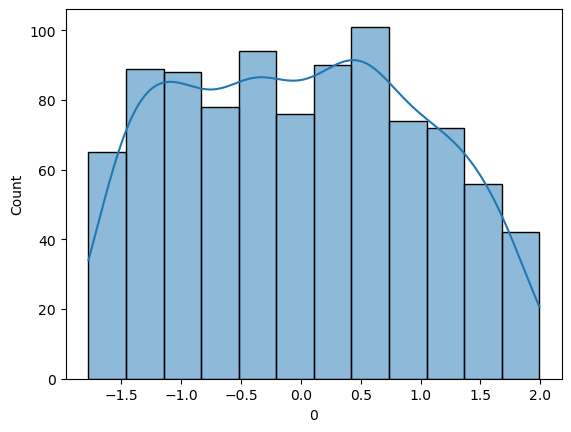

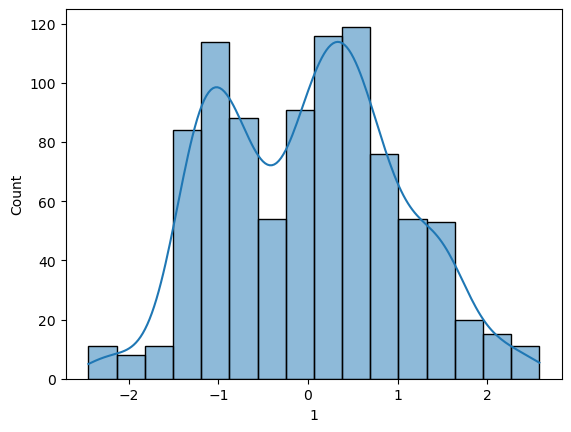

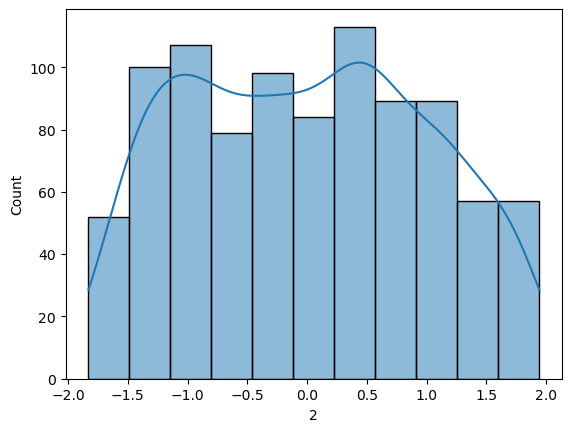

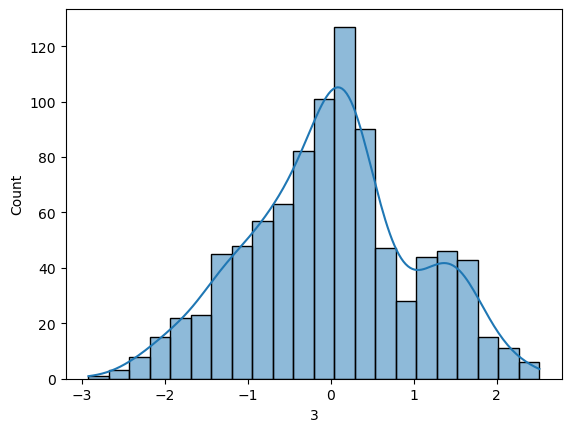

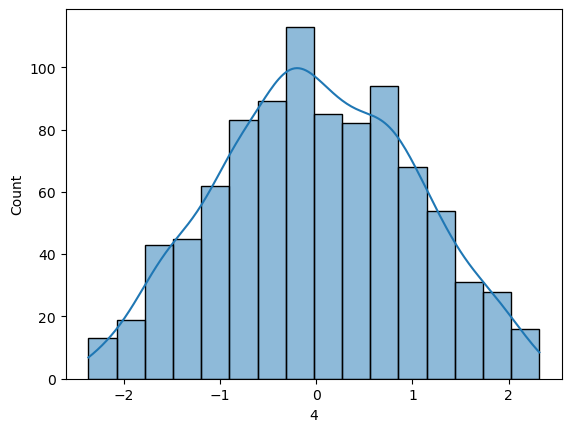

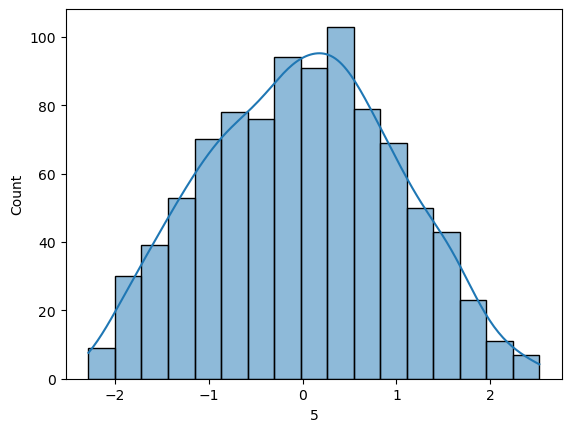

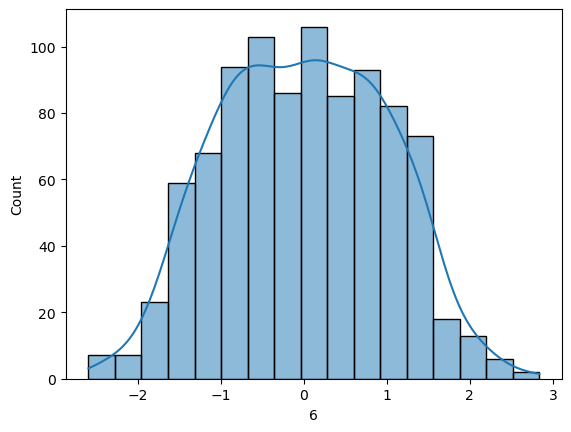

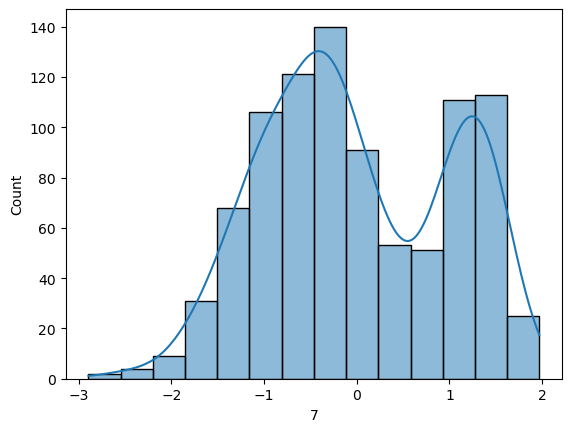

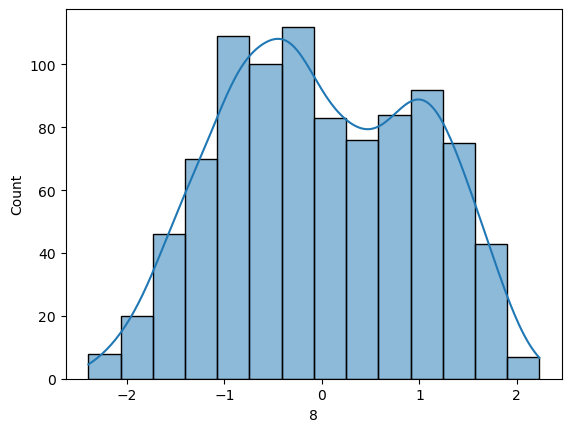

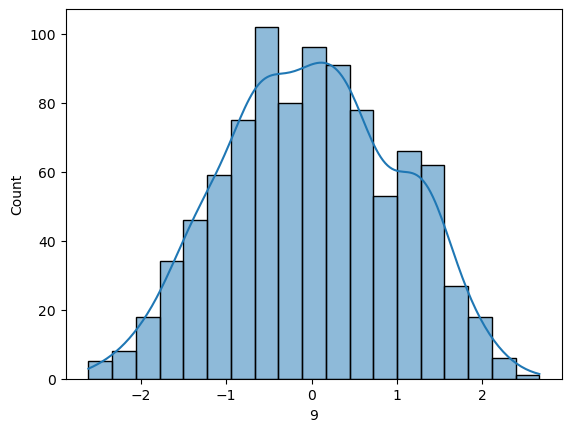

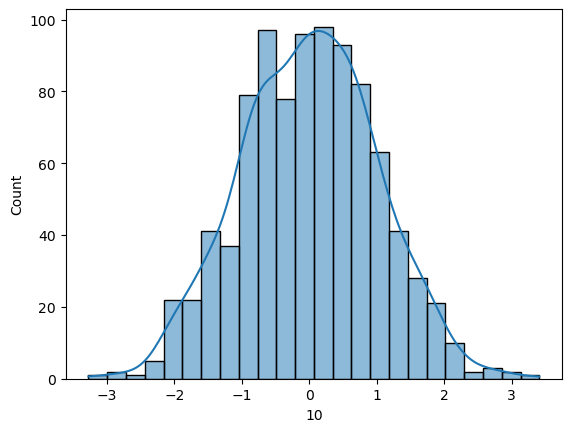

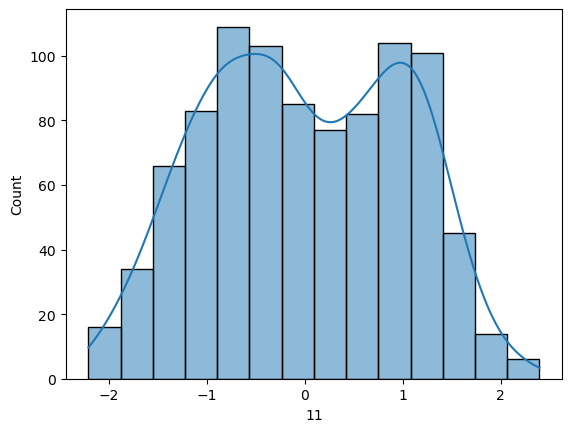

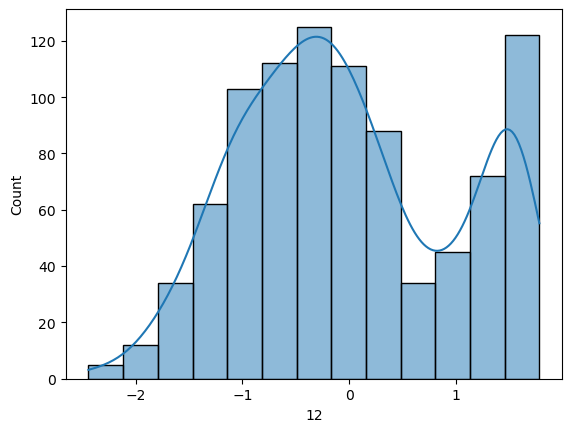

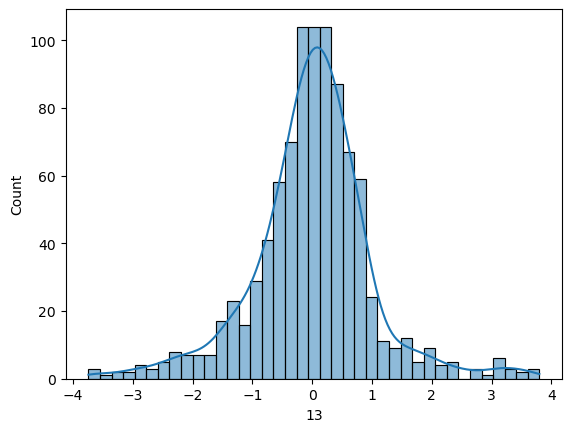

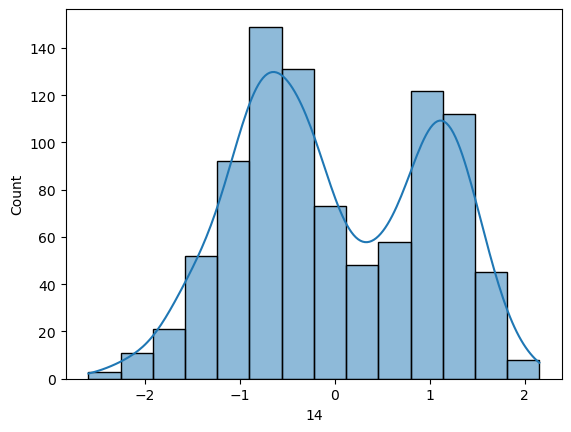

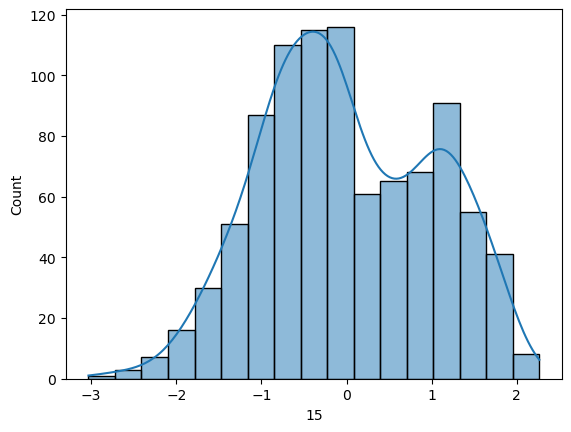

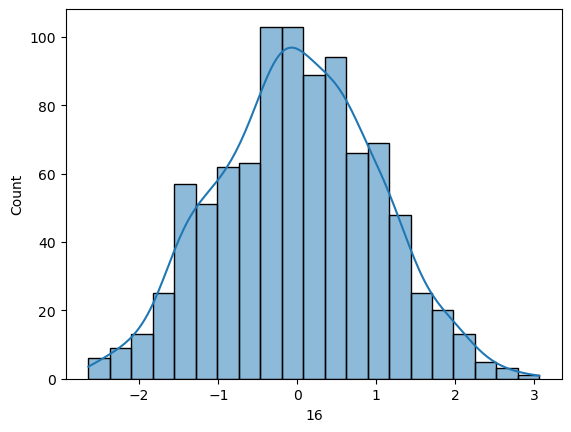

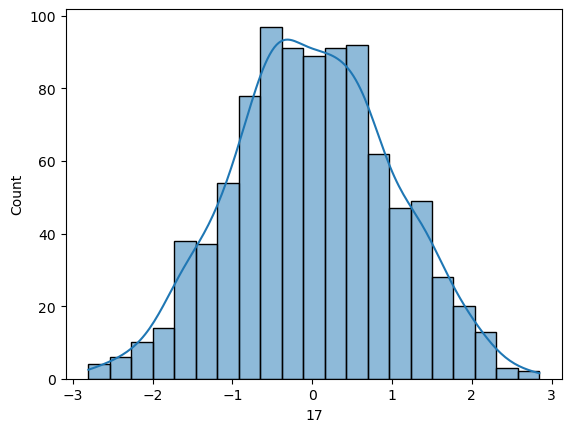

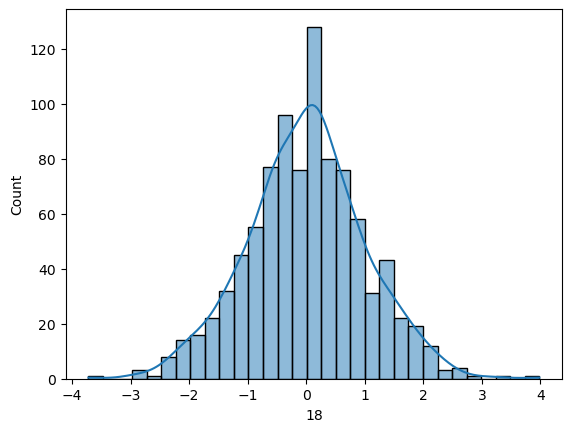

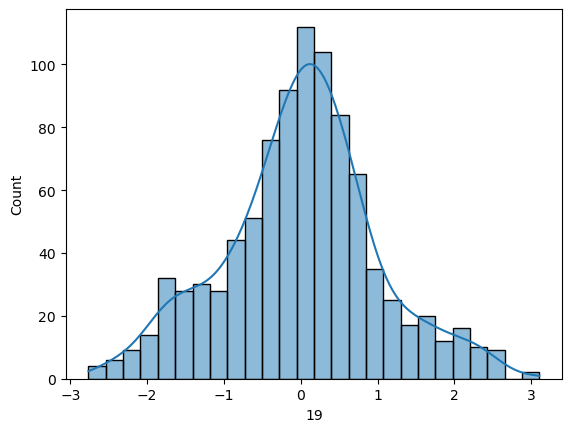

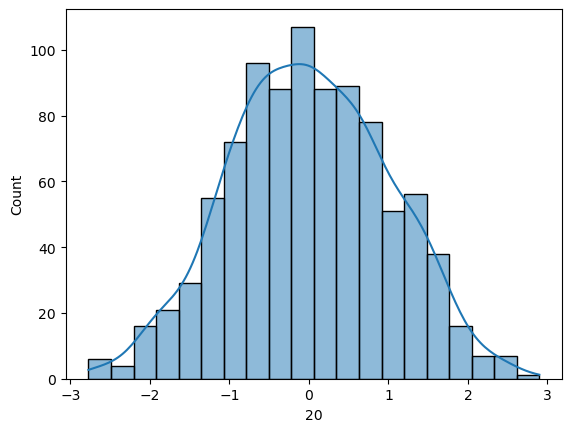

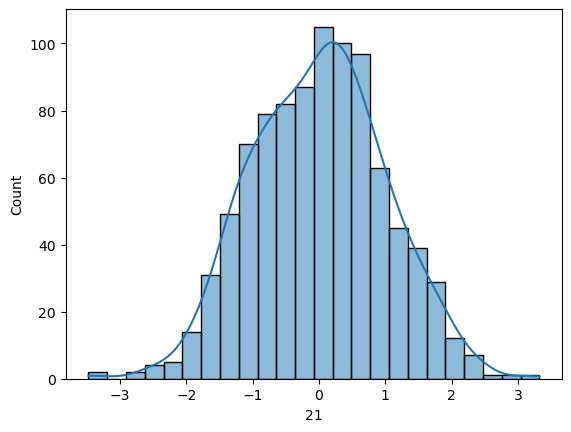

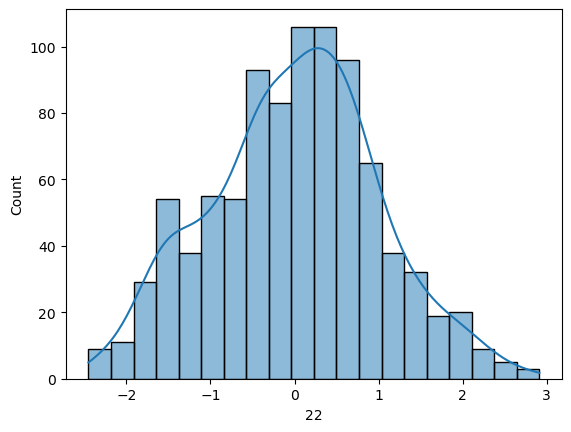

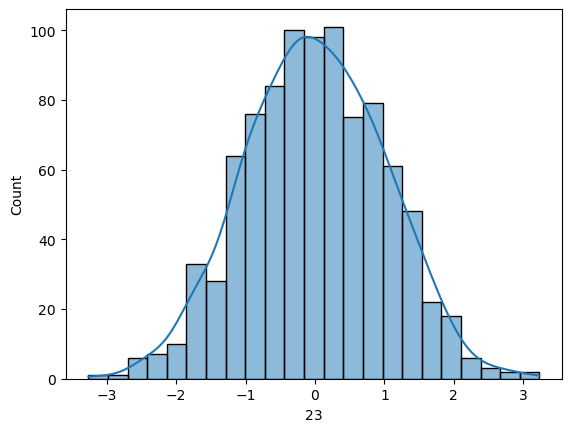

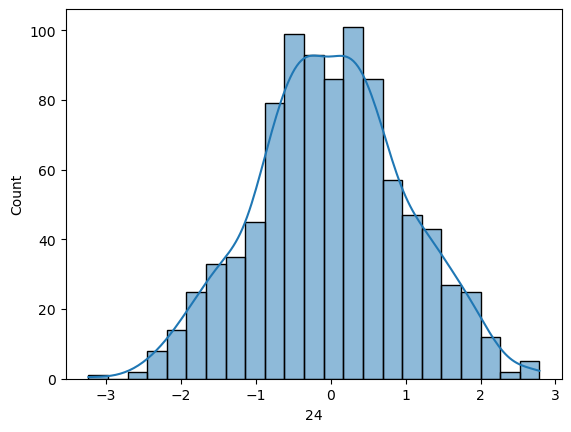

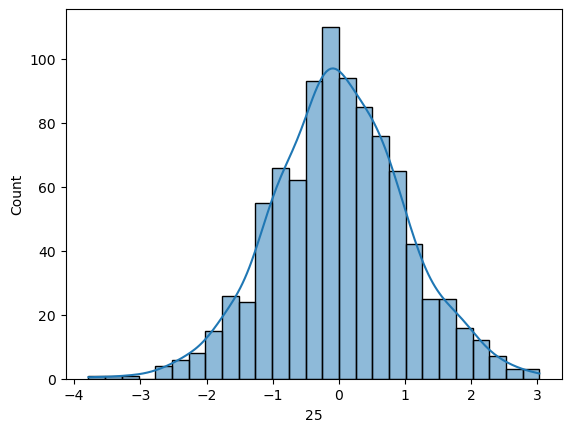

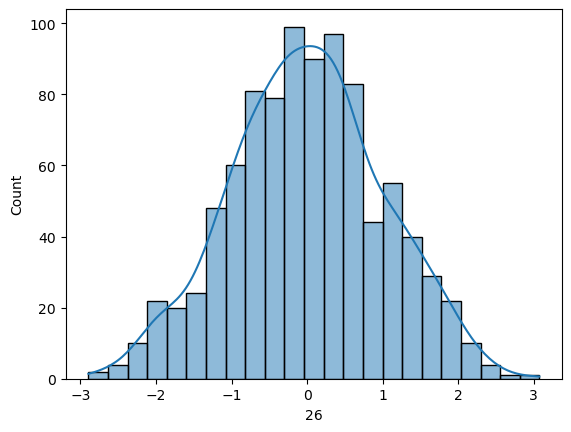

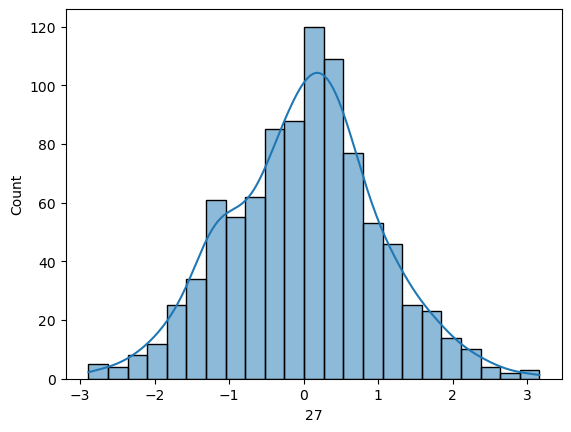

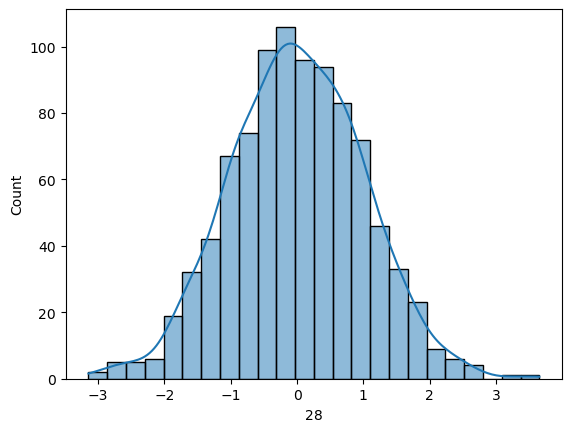

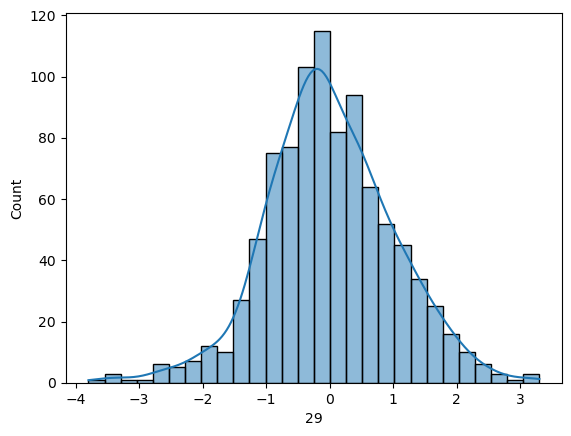

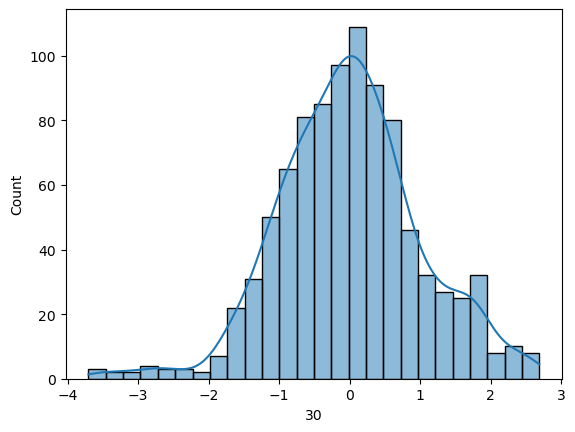

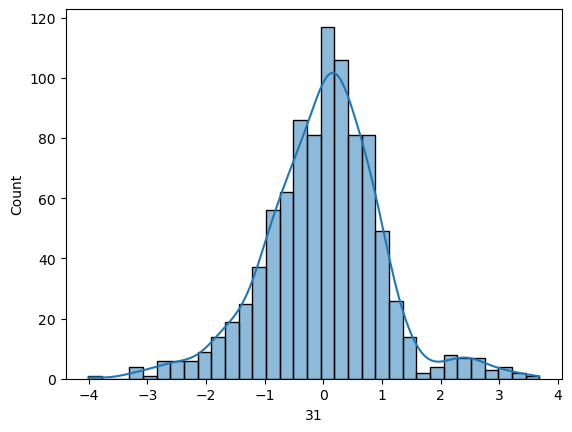

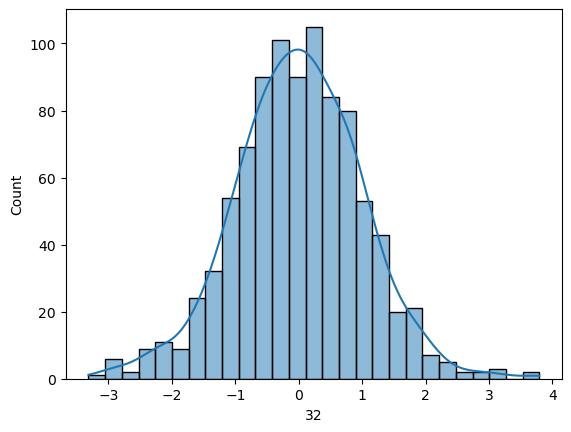

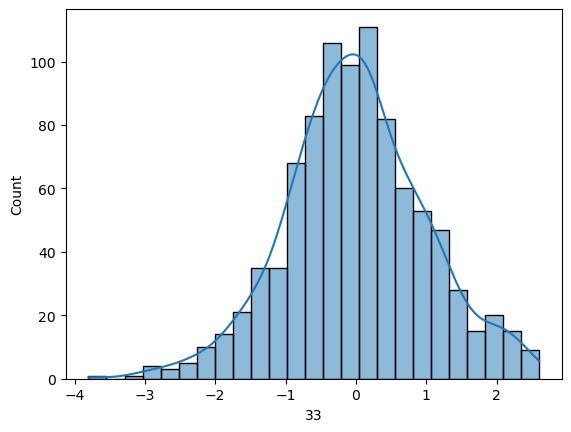

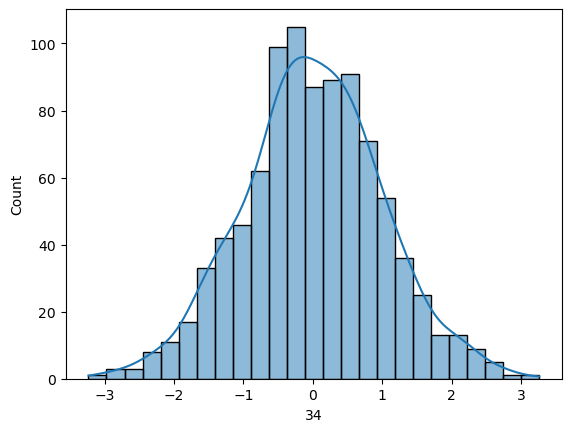

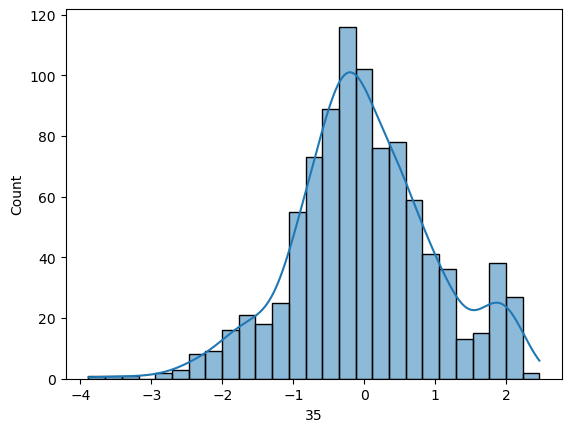

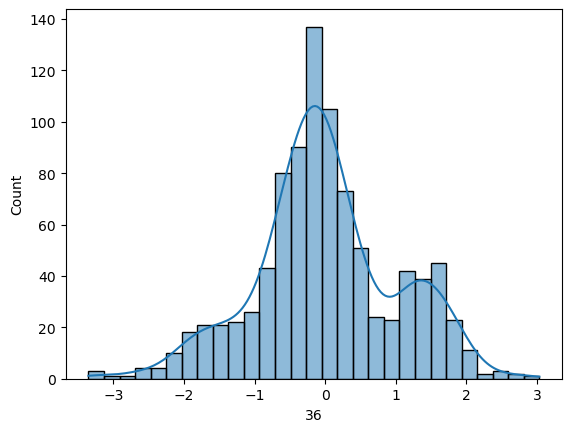

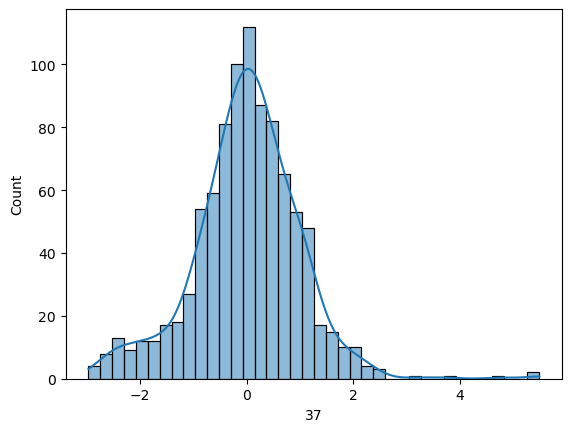

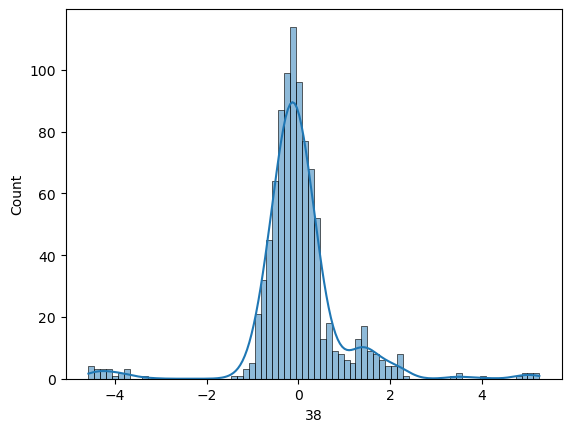

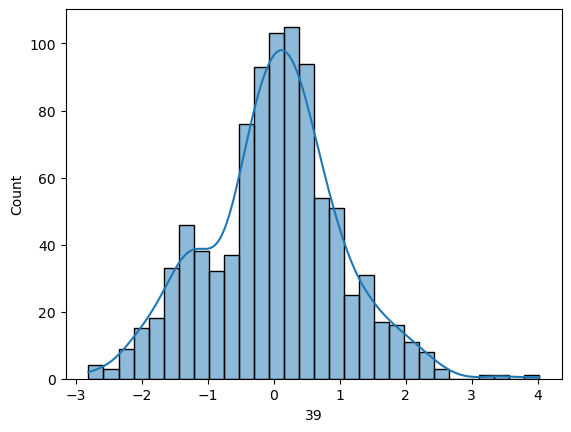

In [45]:
for i in X_transformed.columns:
    sns.histplot(data = X_transformed, x = i, kde = True)
    plt.show()

In [64]:
Y = pd.DataFrame(y)
Y.shape

(925, 1)

In [65]:
y.value_counts()

0    762
1    163
Name: Attrition, dtype: int64

In [49]:
x1 = X_transformed.copy()
x1.shape

(925, 40)

In [55]:
smote = SMOTE(random_state=42)


X_resampled, y_resampled = smote.fit_resample(x1, y)

In [56]:
y_resampled.value_counts()

0    762
1    762
Name: Attrition, dtype: int64

In [57]:
# after Oversampling increase in dat

In [58]:
599/1524 * 100

39.30446194225722

# Distribution of data

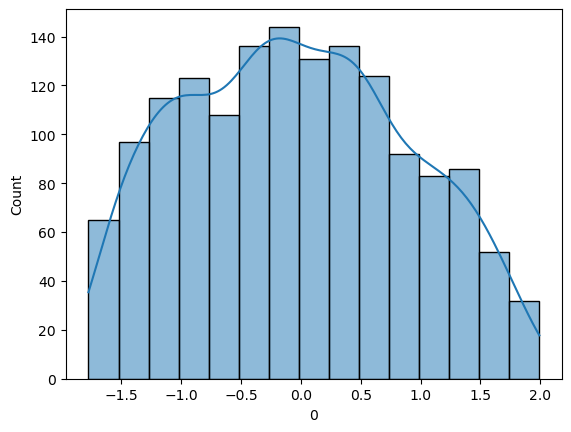

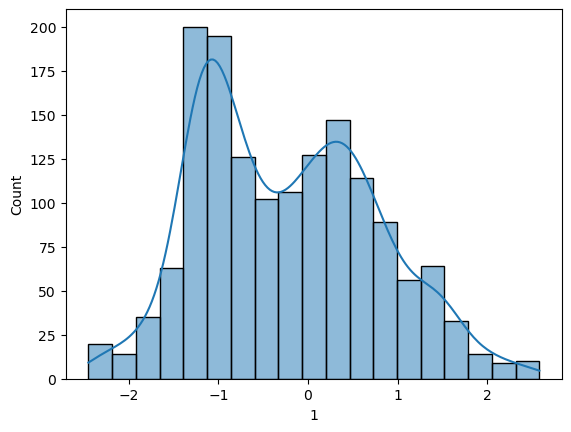

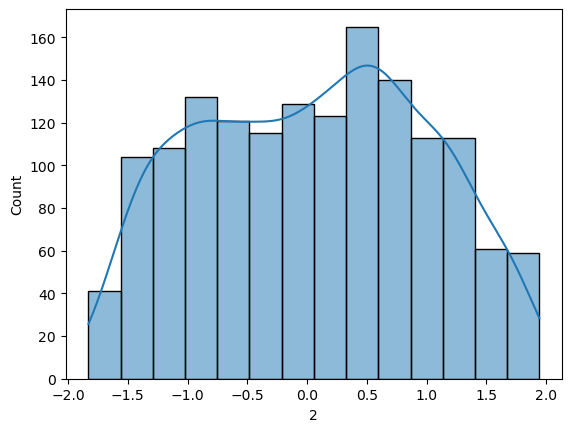

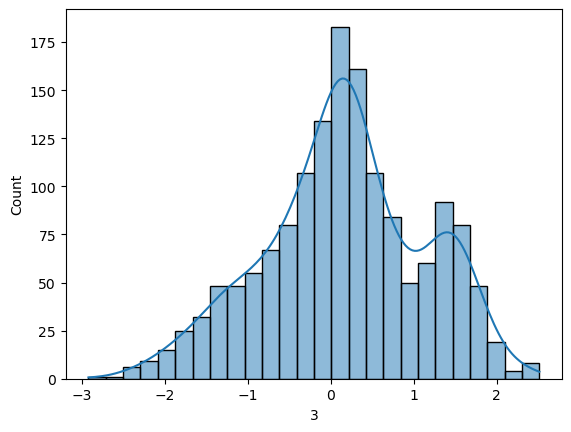

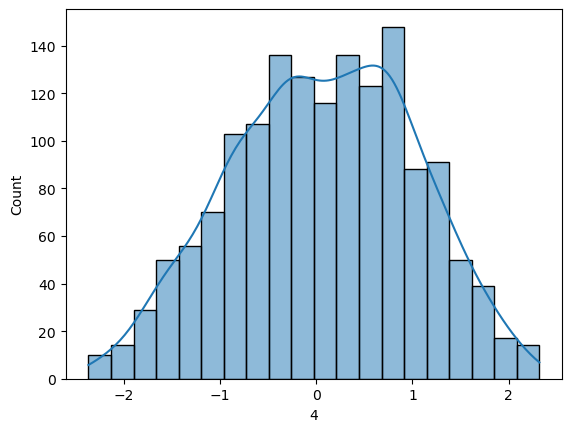

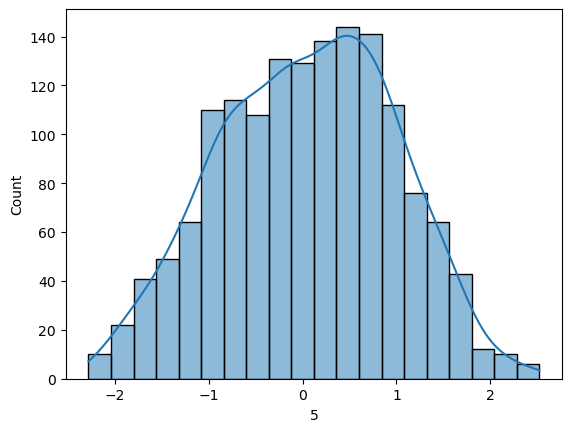

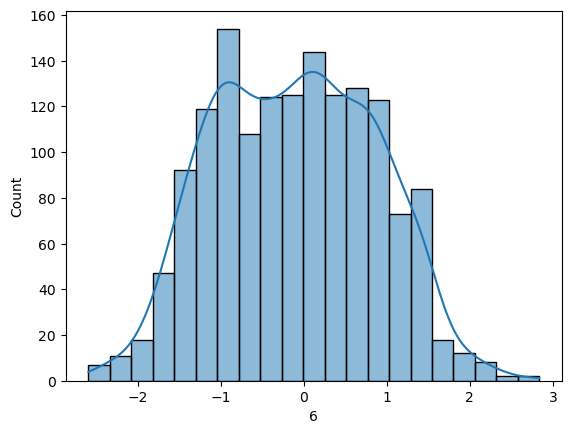

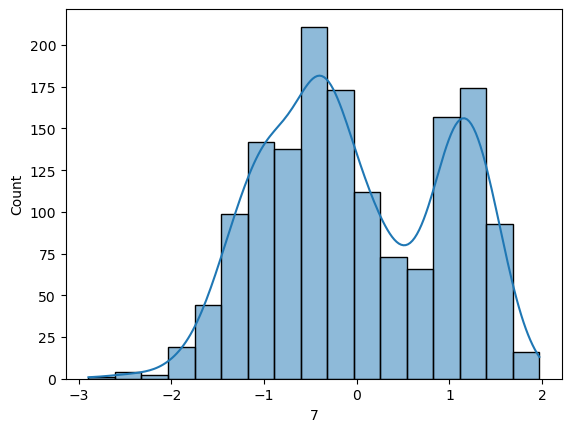

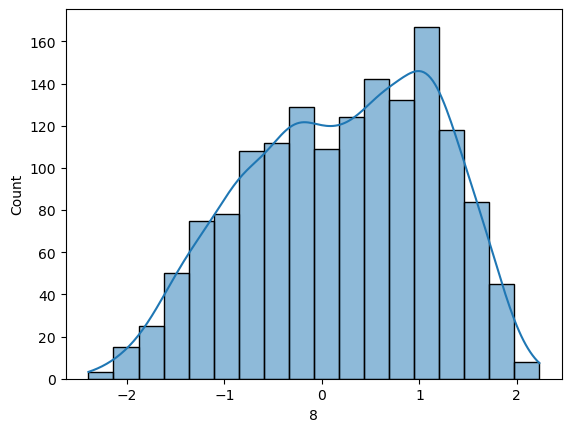

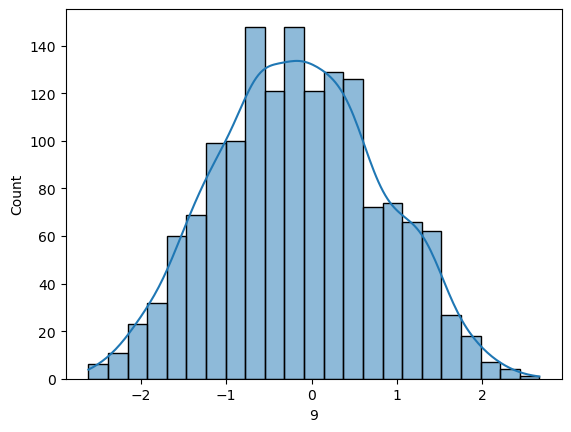

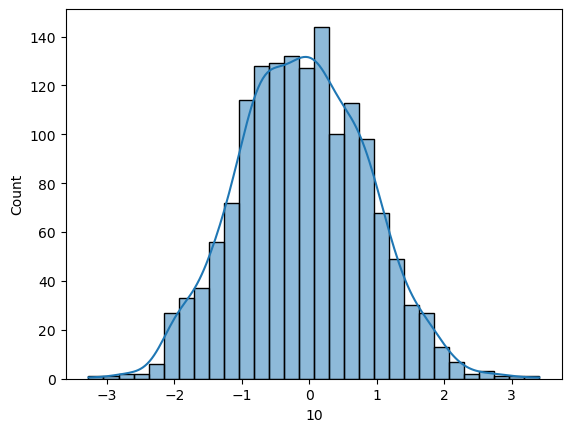

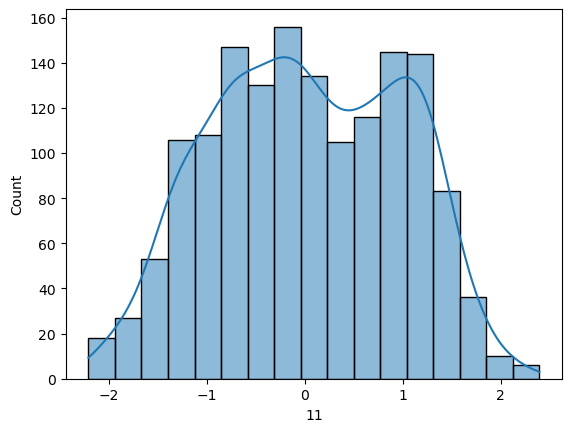

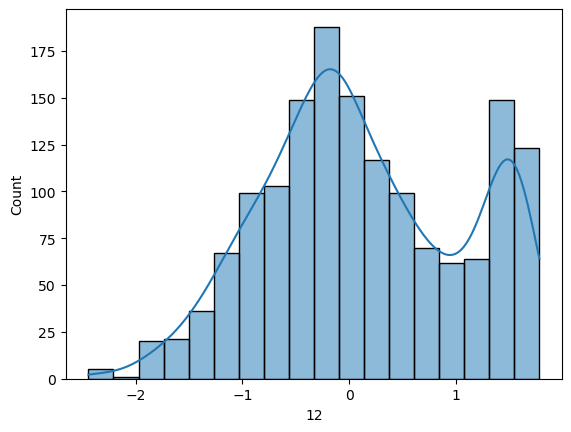

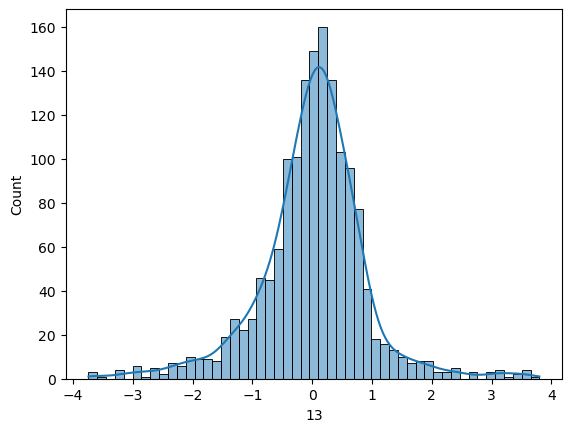

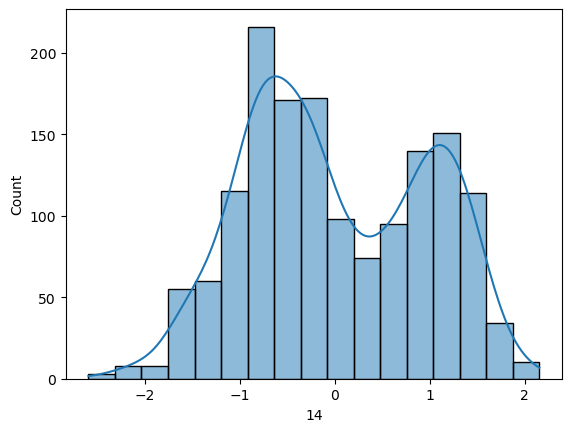

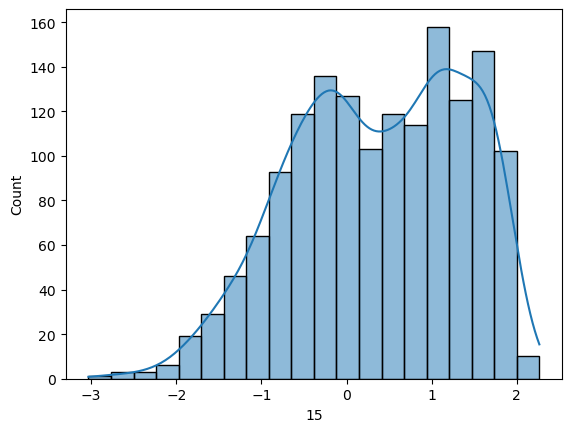

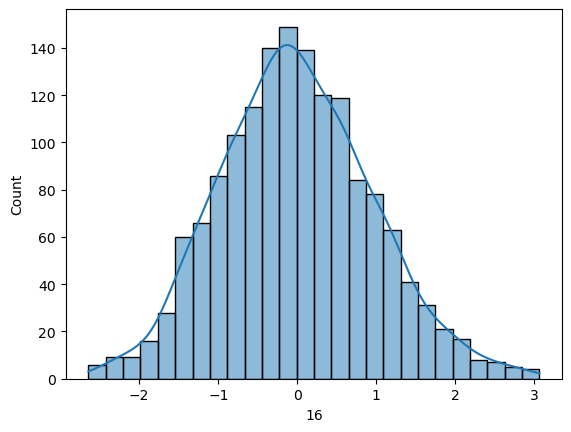

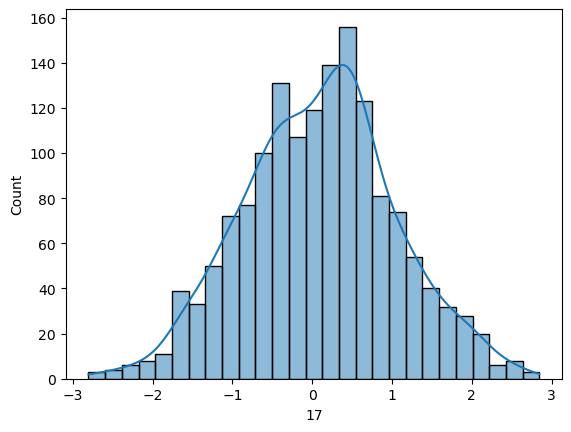

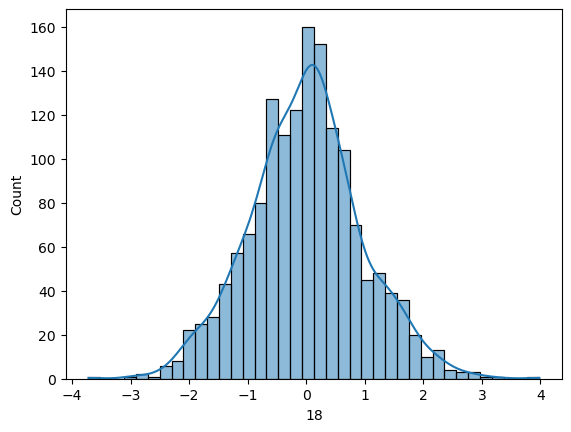

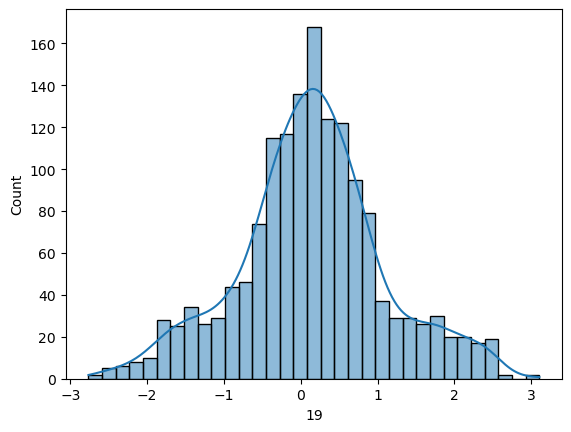

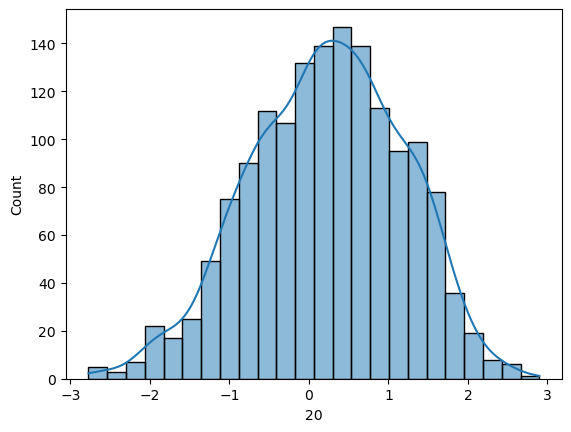

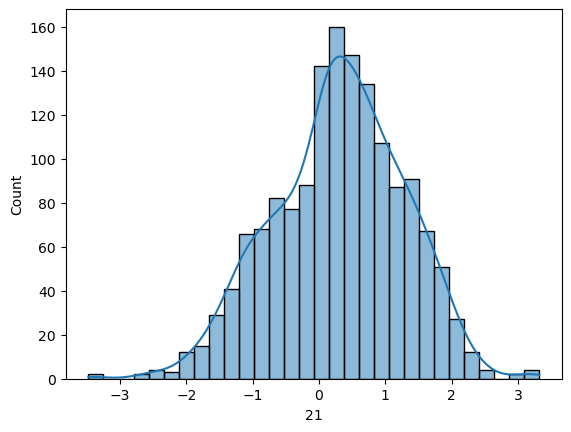

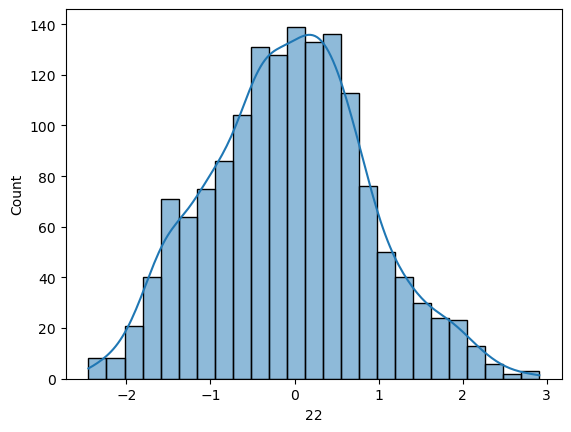

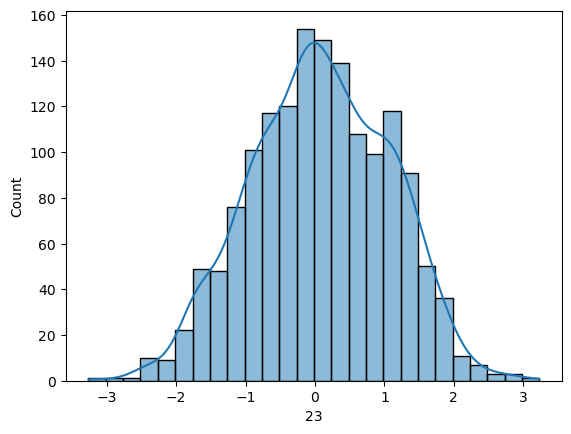

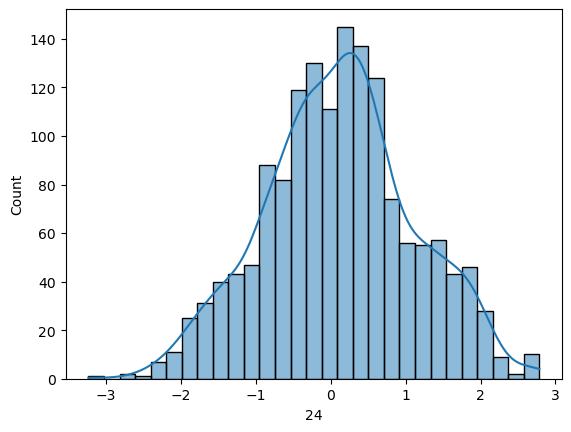

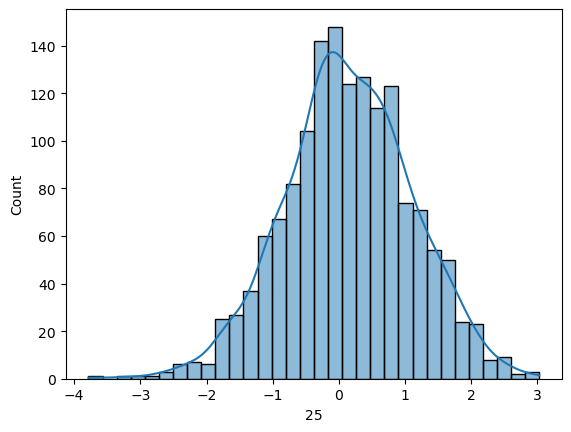

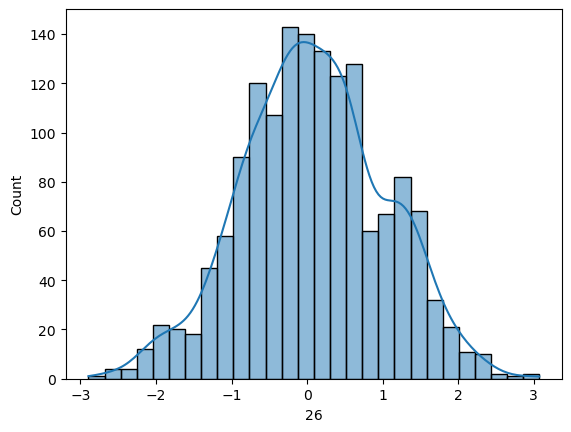

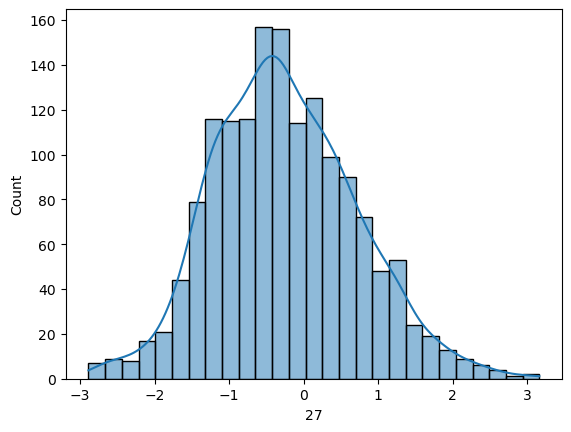

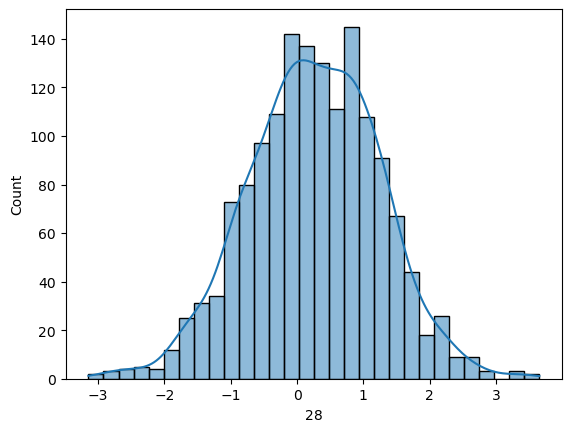

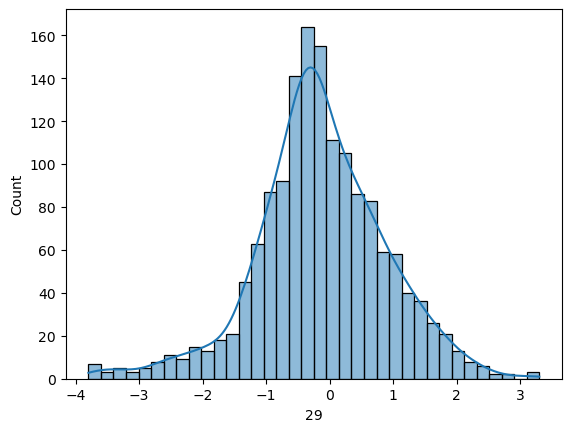

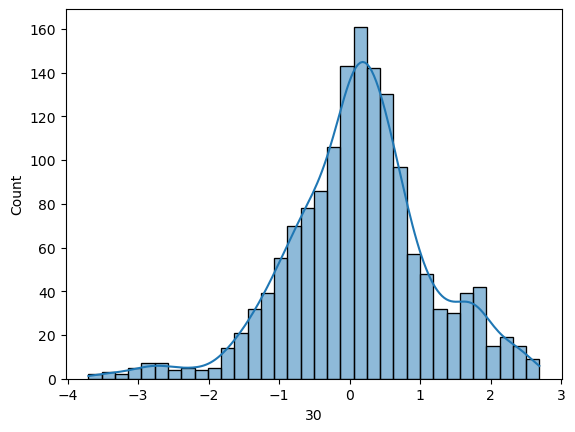

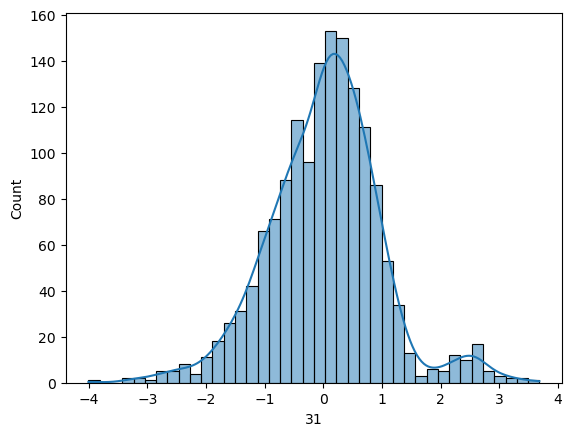

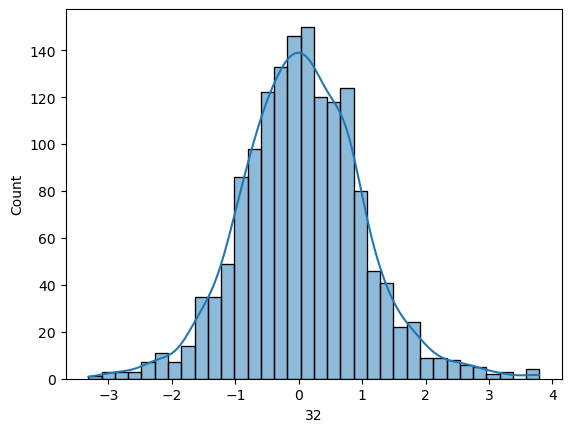

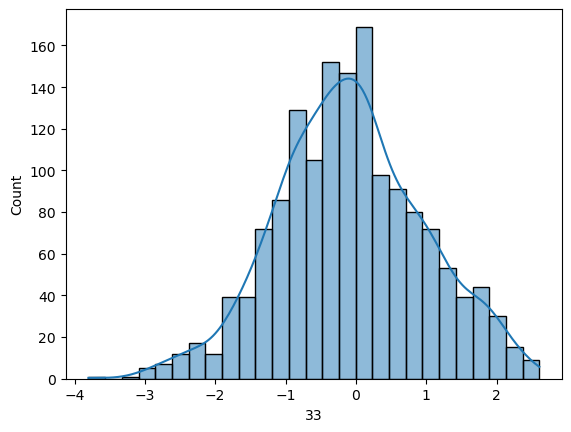

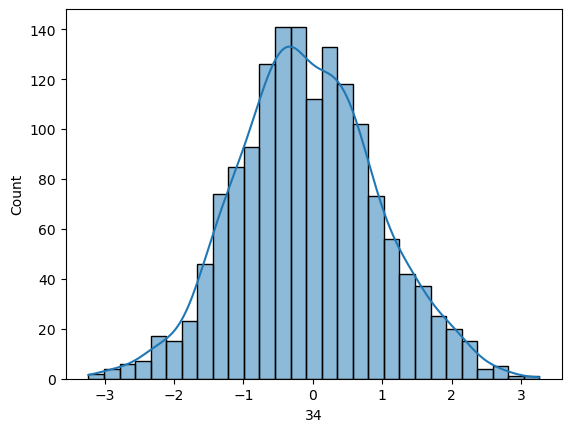

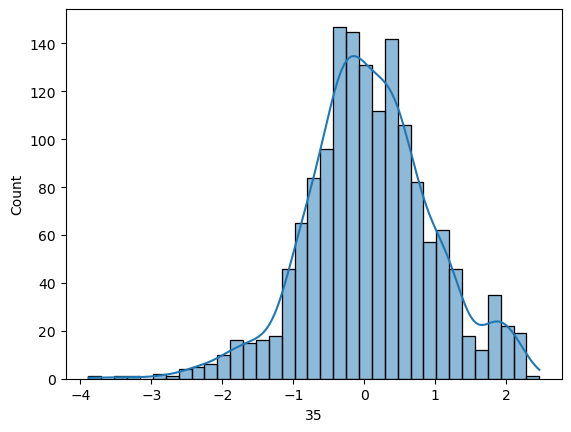

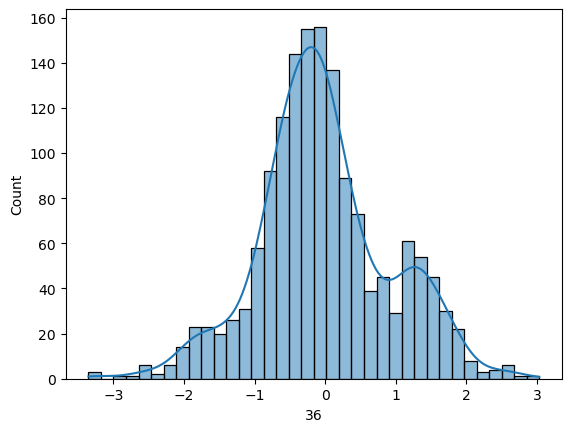

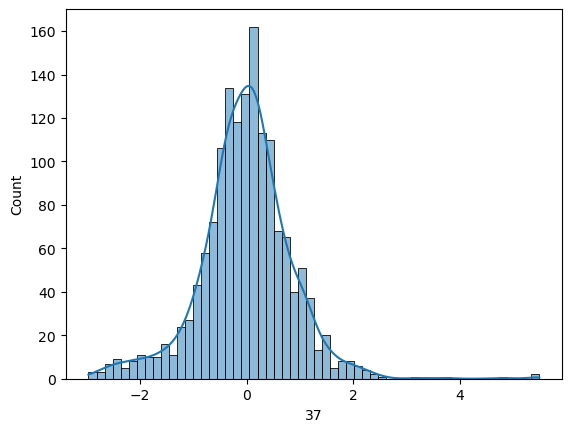

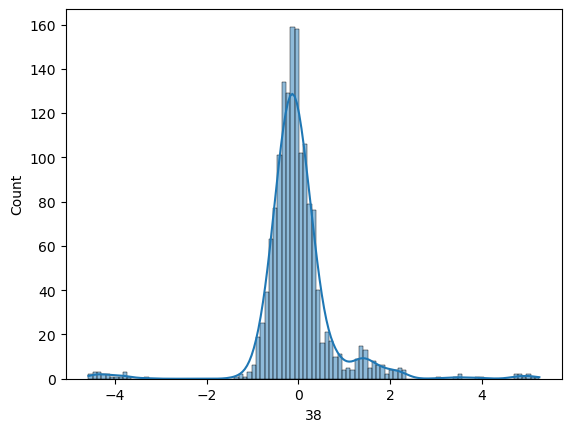

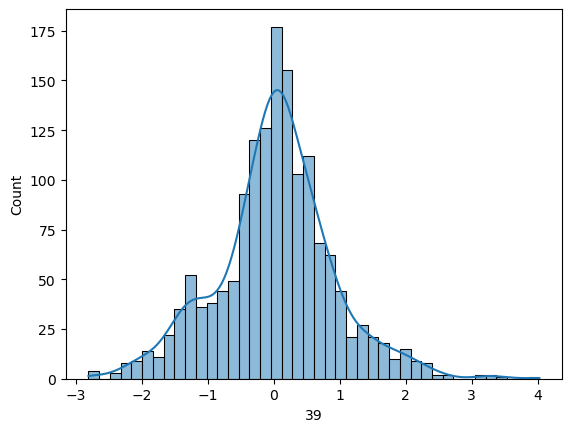

In [53]:
for i in X_resampled.columns:
    sns.histplot(data = X_resampled, x = i, kde = True)
    plt.show()

# Standard Scaling 

In [59]:
ss = StandardScaler()

In [60]:
X2 = pd.DataFrame(ss.fit_transform(X_resampled))

In [61]:
X2

0         1         2         3         4         5         6   \
0    -1.553645  0.470284  1.227041 -1.448890 -0.004755 -0.091784  0.776113   
1     2.096947 -0.927912 -1.427006  1.623306 -0.143810 -1.522142  1.371215   
2    -1.274083 -0.666828 -1.742442 -0.737205 -0.952253 -0.126484  0.405283   
3     0.369662 -0.423775 -0.637892 -1.571374 -0.508445 -1.286965 -0.747069   
4     0.168332 -0.701445 -1.559033  1.415862  1.291464  0.999514 -0.667058   
...        ...       ...       ...       ...       ...       ...       ...   
1519 -0.275634 -0.474891 -0.715199  0.759255  0.991344  1.304821 -0.806343   
1520  0.047270 -1.215280  1.281845 -0.168684 -0.338657  0.241293  1.050995   
1521  0.316757  1.645477  0.854920  2.253823  1.030241  0.151173 -0.211665   
1522 -0.440251 -1.115569 -0.027618  0.429597 -0.271641  0.542338 -1.835199   
1523  0.956245 -1.028105 -0.365613 -0.467334  1.148181  0.598019 -0.893402   

            7         8         9   ...        30        31        32  \
0    -0.312626 -0.962068  1.220585  ...  0.045176 -0.971940 -0.159279   
1    -0.209926  1.108839 -0.683034  ...  2.121422 -1.497783  0.018188   
2    -0.212981 -0.685048 -1.100982  ... -1.104646 -0.476341  0.223720   
3    -1.296266  0.691276 -0.528520  ... -0.334461  1.117669 -0.268281   
4    -0.820748 -1.258510  0.599909  ... -0.118982  0.337203  0.357912   
...        ...       ...       ...  ...       ...       ...       ...   
1519 -0.163456  0.047924 -0.280385  ...  0.934154  0.512588 -1.292644   
1520  0.163936 -0.425996  0.335111  ... -0.228069 -0.187611  0.139071   
1521  0.690128  1.089251 -0.586858  ...  0.870045  0.790278 -0.077434   
1522  1.128882  1.239110  0.030078  ... -2.391915  0.042808  0.675485   
1523  0.198165 -0.144429  0.068796  ...  1.626261  2.551949  2.853326   

            33        34        35        36        37        38        39  
0    -0.224759  1.359864 -1.210480  0.033777  0.121671  0.314457 -1.881733  
1    -0.231219  0.187477 -0.085910 -1.202689 -0.694797 -0.373765  0.053350  
2    -0.048330  0.544980  0.650573  1.937500  0.359380 -0.257354  0.180270  
3     0.688937 -0.637686 -0.941527  0.480930  0.106827 -0.618206  0.569284  
4    -0.970726 -0.344983  0.195448  1.696157  0.505786 -0.358923 -0.016100  
...        ...       ...       ...       ...       ...       ...       ...  
1519  0.038552  1.819920 -0.695603 -0.154833 -0.769879  0.162291 -0.595055  
1520 -0.629938 -0.277628 -0.322214  0.074567 -0.493365  0.234341 -0.290310  
1521  0.553380 -1.770774  0.262412 -0.905712  0.831634  0.163503 -1.312402  
1522 -0.388117 -0.012079  0.348729 -0.148985 -0.119774  0.125568 -0.159661  
1523 -0.208070  0.397770  0.930767  0.393295  0.152247 -0.425652  0.204311  

[1524 rows x 40 columns]

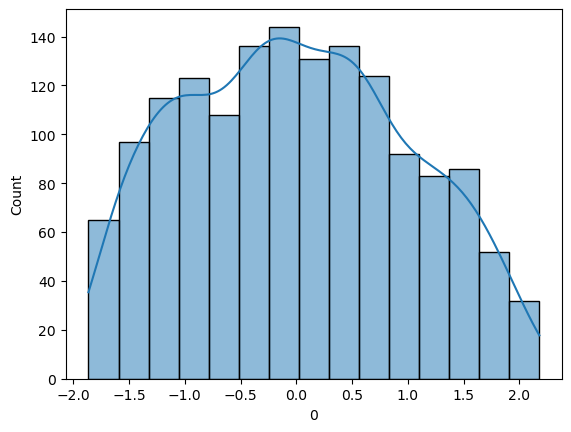

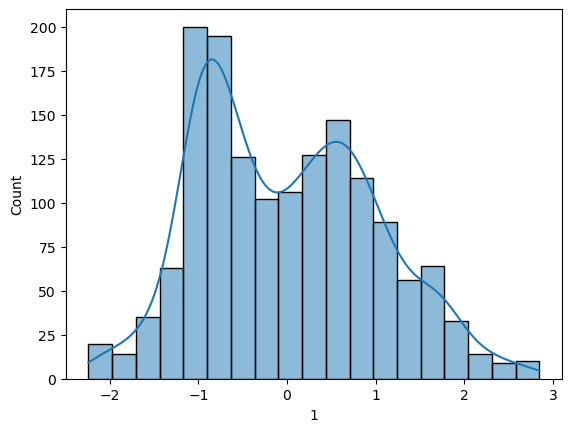

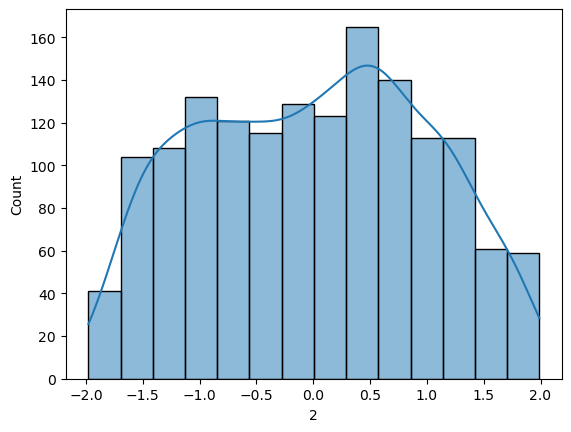

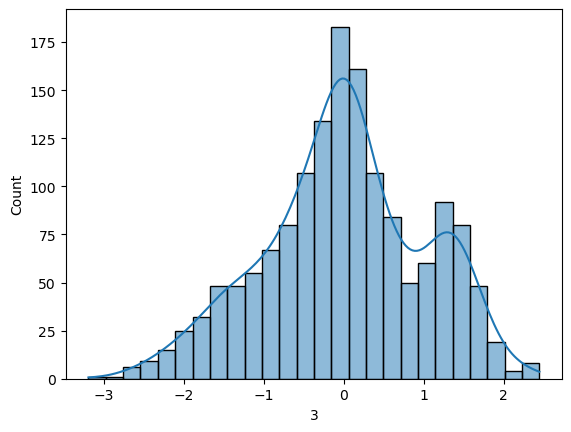

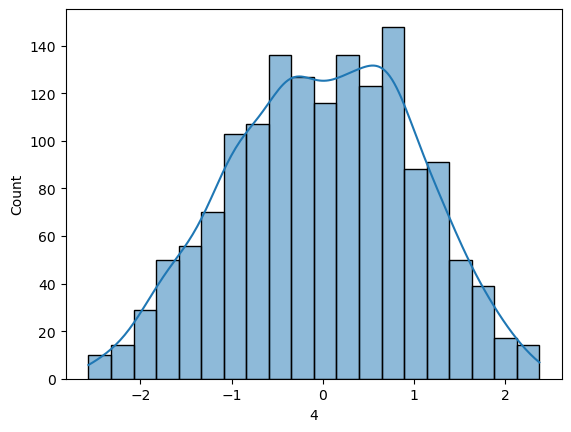

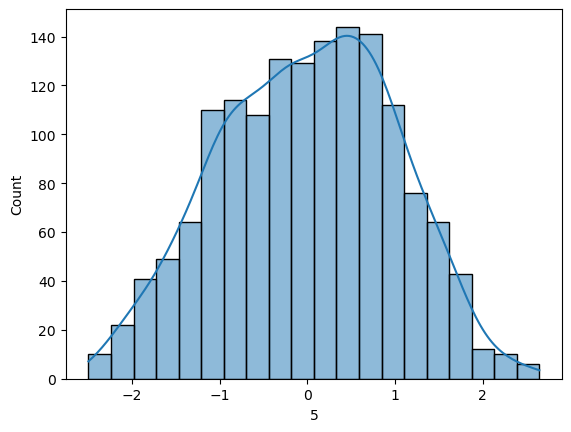

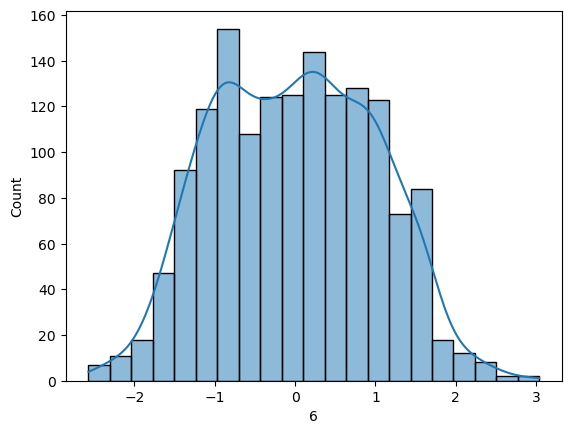

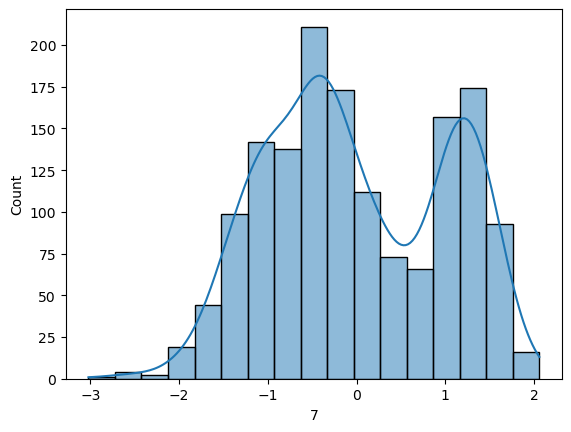

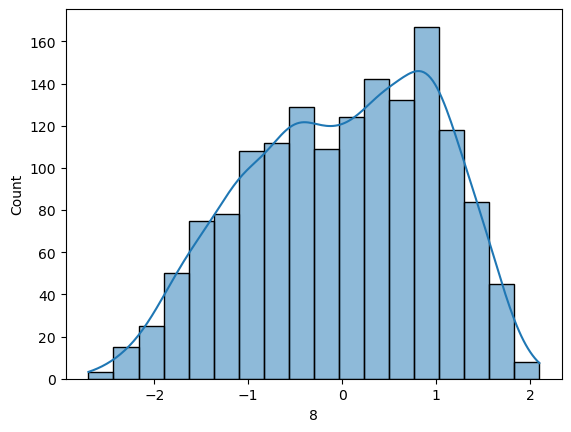

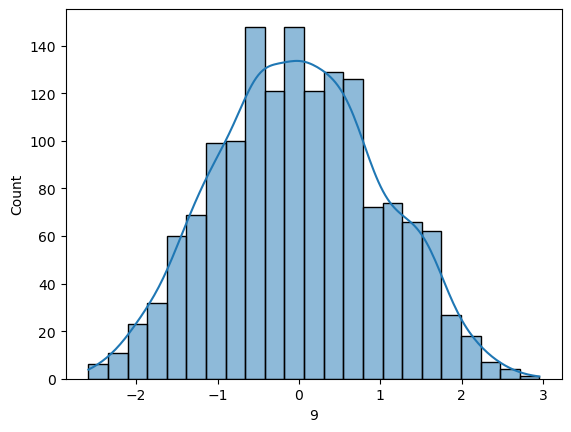

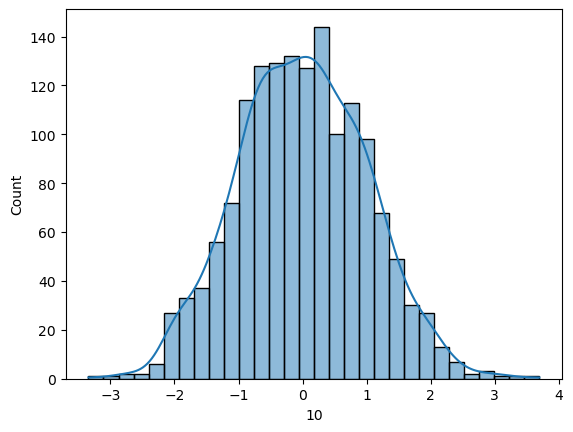

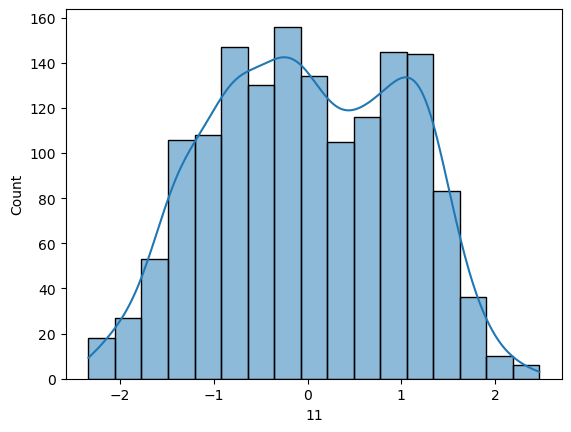

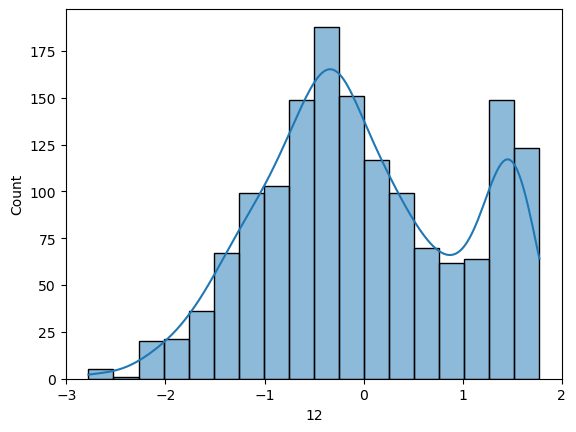

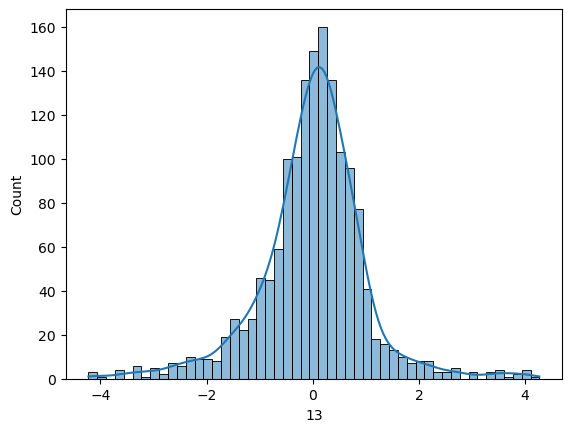

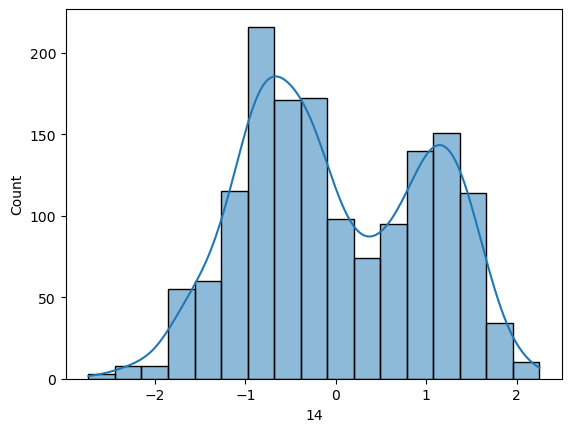

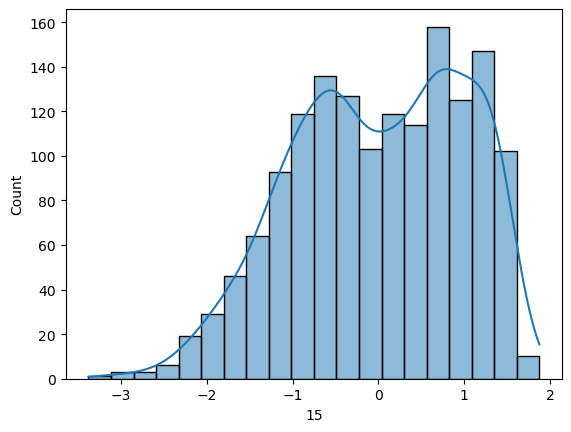

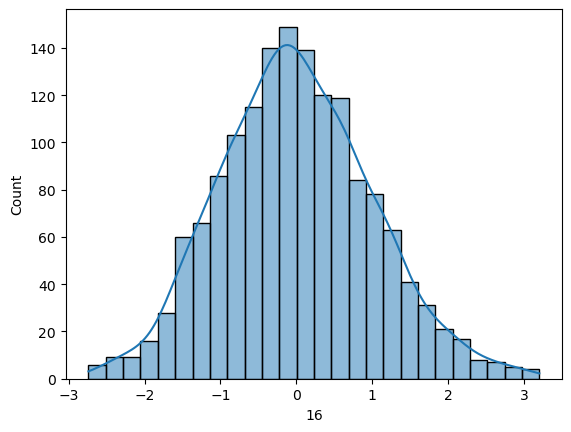

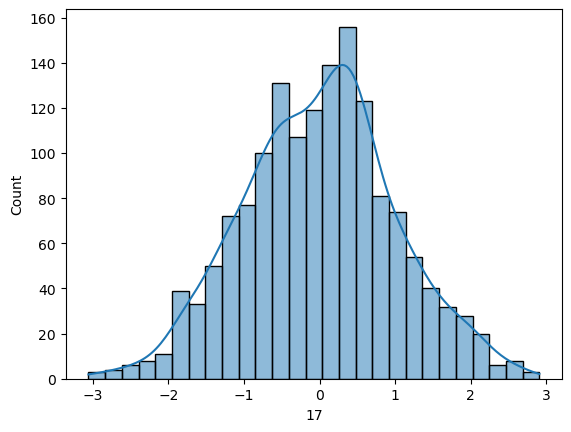

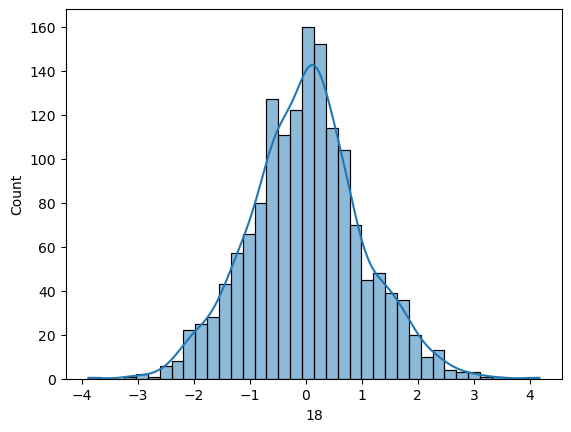

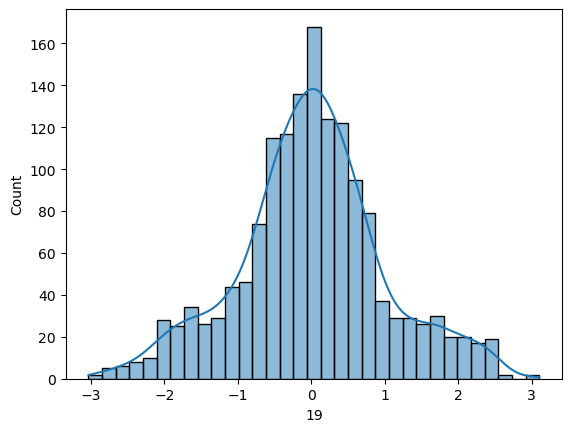

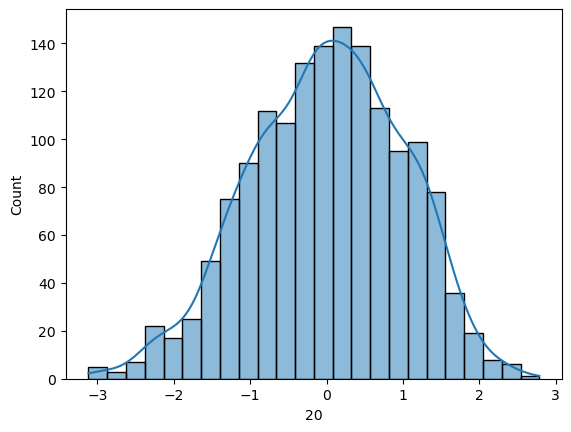

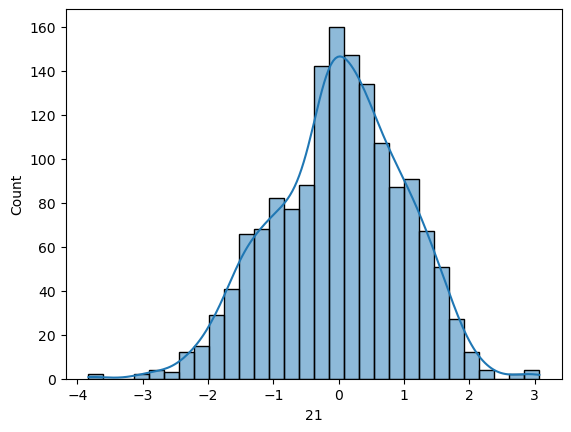

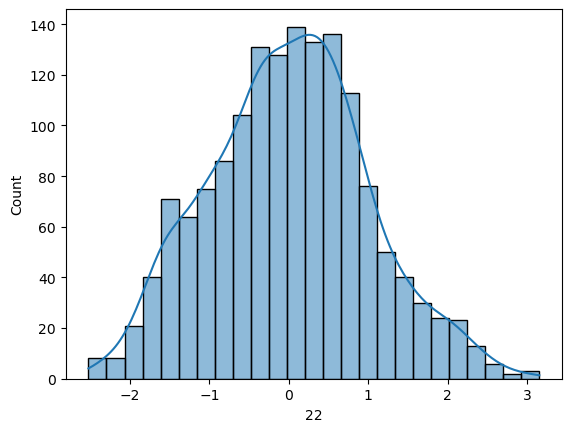

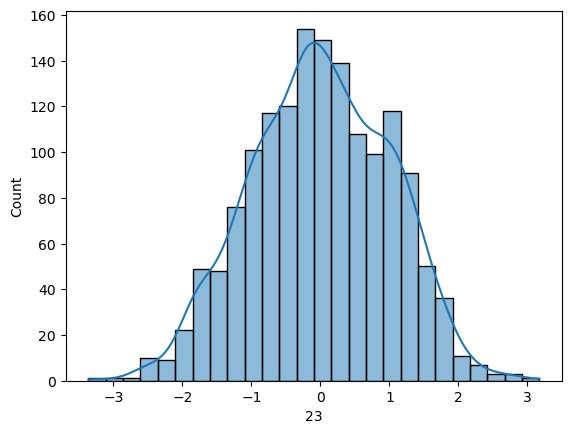

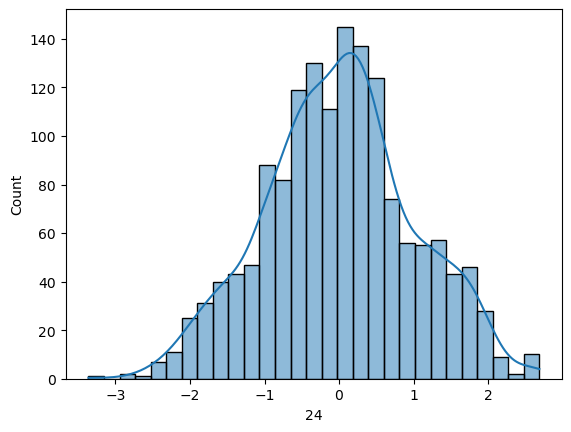

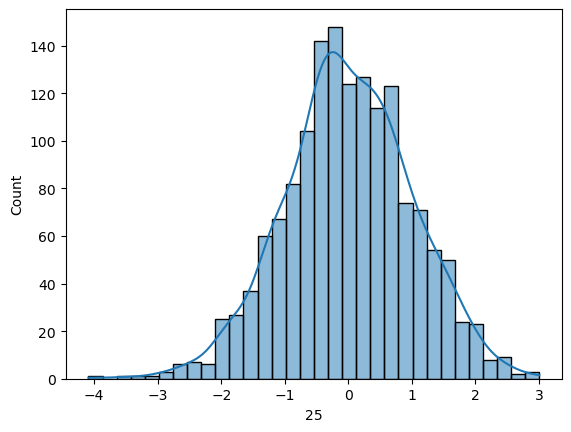

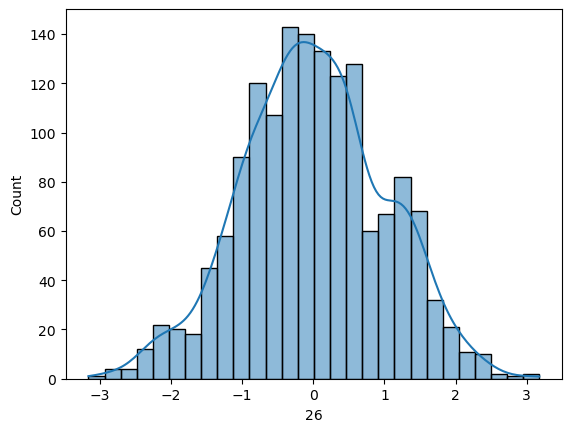

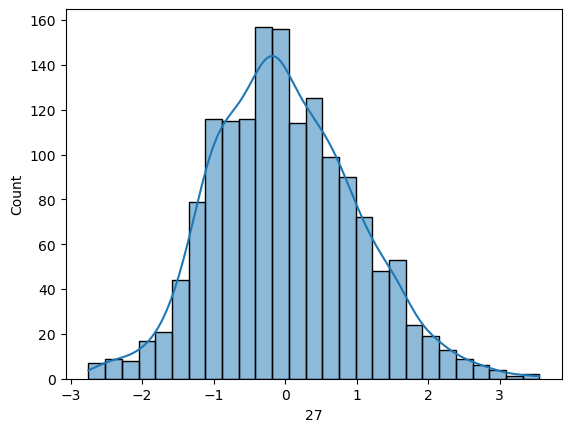

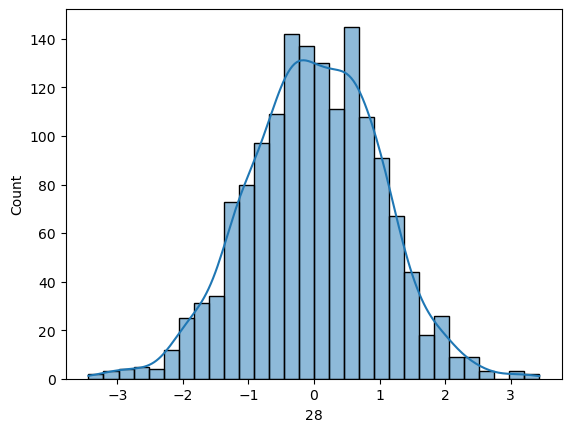

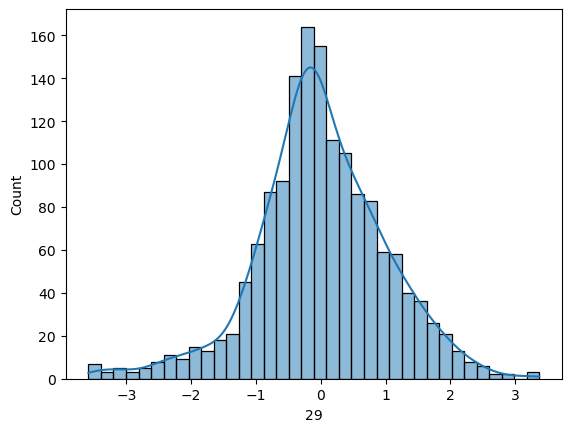

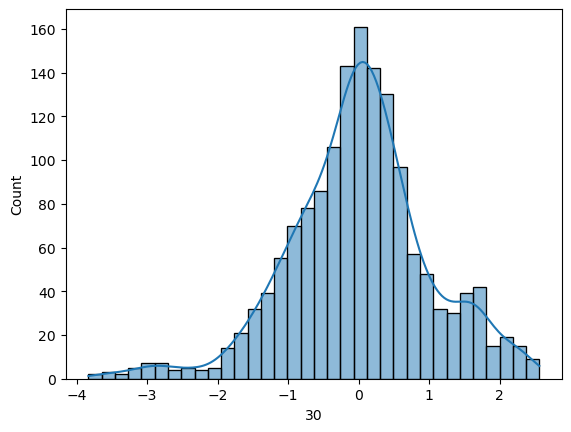

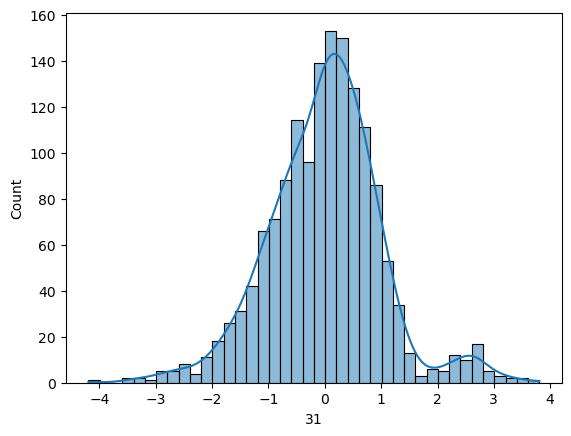

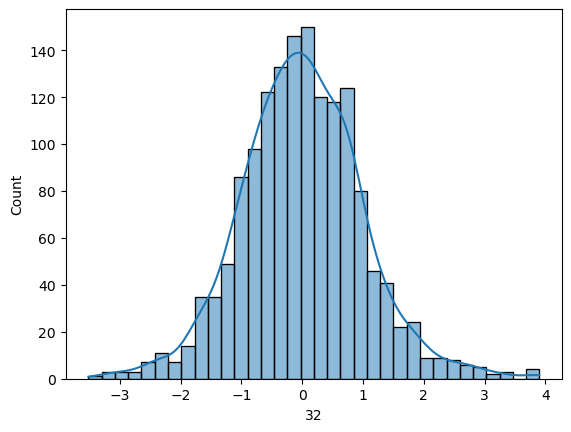

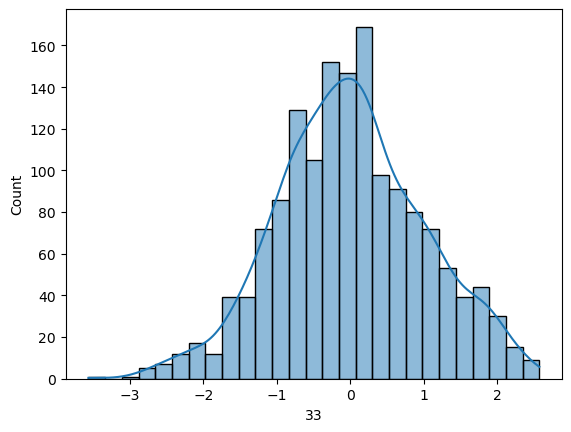

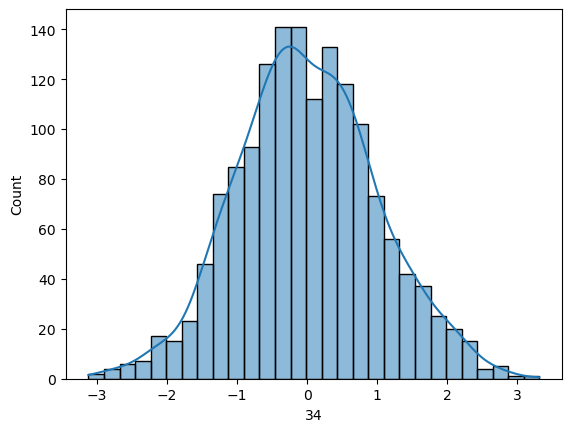

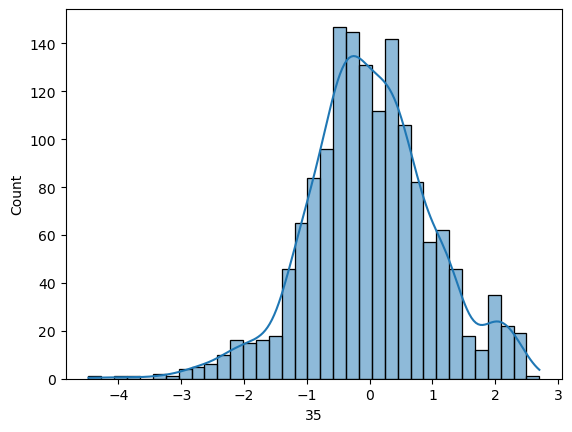

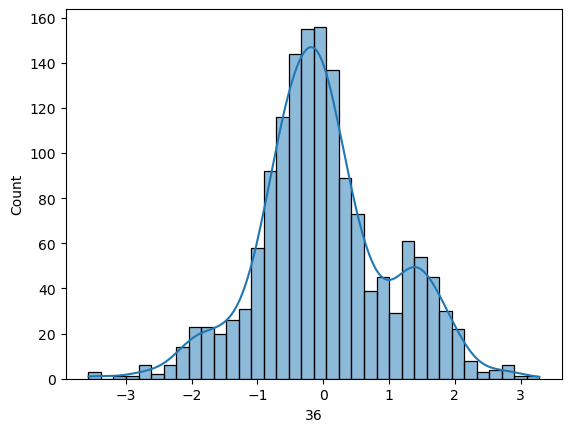

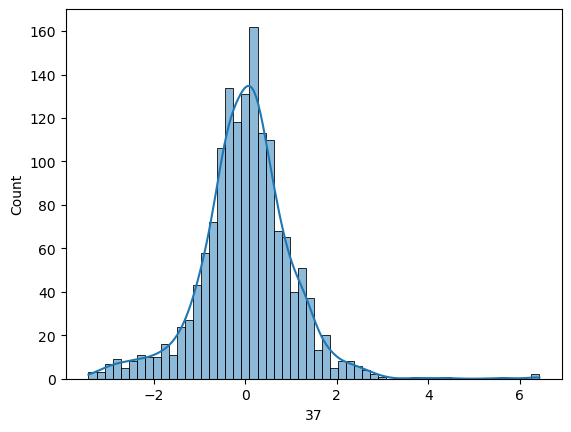

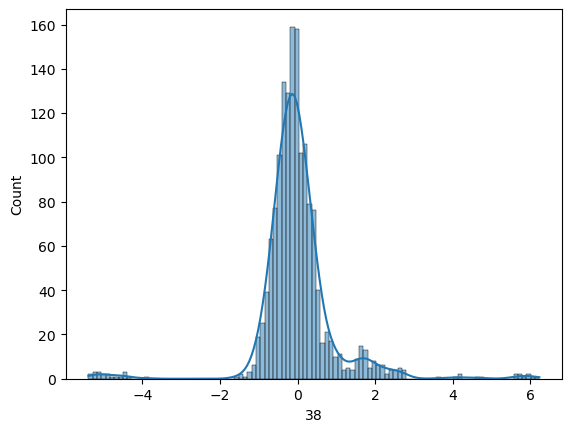

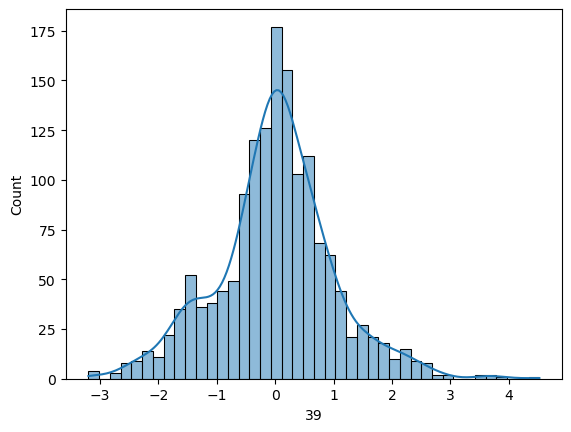

In [62]:
for i in X2.columns:
    sns.histplot(data = X2, x = i, kde = True)
    plt.show()

# train Test Split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(X2, y_resampled, test_size=0.25, random_state=42, stratify = y_resampled)

In [64]:
y_train.value_counts()

1    572
0    571
Name: Attrition, dtype: int64

In [65]:
y_test.value_counts()

0    191
1    190
Name: Attrition, dtype: int64

# Model Building 

In [66]:
kbc = KNeighborsClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
lr = LogisticRegression()
gbc = GradientBoostingClassifier()

In [67]:
models = {'kNN': KNeighborsClassifier(), 'RFC': RandomForestClassifier(), 'ADA': AdaBoostClassifier(), 'LR': LogisticRegression(), 'GBC': GradientBoostingClassifier()}

In [68]:
models

{'kNN': KNeighborsClassifier(),
 'RFC': RandomForestClassifier(),
 'ADA': AdaBoostClassifier(),
 'LR': LogisticRegression(),
 'GBC': GradientBoostingClassifier()}

In [69]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    accuray = accuracy_score(y_train_pred, y_train)
    y_test_pred = model.predict(x_test)
    accuracy1 = accuracy_score(y_test_pred, y_test)
    print(model_name,'Training_model_ Accuracy', accuray)
    print(model_name,'Test_model_ Accuracy', accuracy1)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(roc_auc_score(y_train_pred, y_train))
    print(roc_auc_score(y_test_pred, y_test))
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(confusion_matrix(y_train_pred, y_train))
    print(confusion_matrix(y_test_pred, y_test))
    print('..........................................')
    print('..........................................')
  

kNN Training_model_ Accuracy 0.9440069991251093
kNN Test_model_ Accuracy 0.9291338582677166
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.949685534591195
0.9377880184331797
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
[[507   0]
 [ 64 572]]
[[164   0]
 [ 27 190]]
..........................................
..........................................
RFC Training_model_ Accuracy 1.0
RFC Test_model_ Accuracy 0.994750656167979
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0
0.9948186528497409
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
[[571   0]
 [  0 572]]
[[191   2]
 [  0 188]]
..........................................
..........................................
ADA Training_model_ Accuracy 1.0
ADA Test_model_ Accuracy 0.9973753280839895
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0
0.9973821989528796
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
[[571   0]
 [  0 572]]
[[190   0]
 [  1 190]]
..........................................
..........................................
LR Training_model_ Accuracy 1.0
LR Test_mo

# cross_val_score

In [70]:
for model_name, model in models.items():
    score =cross_val_score(model, x_train, y_train)
    print(model_name,'score is', np.mean(score))
    print('.................................')
    

kNN score is 0.8985290737761433
.................................
RFC score is 0.9956216961618019
.................................
ADA score is 0.9964950586072167
.................................
LR score is 1.0
.................................
GBC score is 0.9929901172144335
.................................


# Best_ Model 

In [71]:
rfc =  RandomForestClassifier()

In [72]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

# Accuracy Score 

In [92]:
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)
accuracy = accuracy_score(y_pred_train, y_train)
score1 = accuracy_score(y_pred_test, y_test)
print('accuracy_score_Traning :', accuracy, 'accuracy_score_Test :', score1)

accuracy_score_Traning : 1.0 accuracy_score_Test : 1.0


# ROC_AUC

In [93]:
score2 = roc_auc_score(y_pred_train, y_train)
score3 = roc_auc_score(y_pred_test, y_test)

print('ROC_AUC_Traning :', score2, 'ROC_AUC_Test :', score3)

ROC_AUC_Traning : 1.0 ROC_AUC_Test : 1.0


# Classification Report

In [94]:
score4 = confusion_matrix(y_pred_train, y_train)
score5 = confusion_matrix(y_pred_test, y_test)

print(score4)
print(',,,,,,,,,,,,,,')
print(score5)

[[571   0]
 [  0 572]]
,,,,,,,,,,,,,,
[[191   0]
 [  0 190]]


# Hyperparameter Tuning

In [76]:
para_meters = {'criterion': ['entropy','gini'],
              'max_depth': [2,3,5,6,7,8,9,10,13,14],
              'min_samples_split': [1,2,3,4],
              'min_samples_leaf': [1,2,3,4,5,6],
              'n_estimators': [50,100,150,200,250,300]}

In [81]:
gscv = RandomizedSearchCV(param_distributions = para_meters, cv=5, estimator=rfc)

In [82]:
gscv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 8, 9, 10,
                                                      13, 14],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]})

In [84]:
gscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'gini'}

# After Hyperparameter Tuning

In [86]:
rfc =  RandomForestClassifier(n_estimators = 300, min_samples_split = 4, min_samples_leaf = 5, max_depth = 8, criterion = 'gini')

In [87]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=300)

# Accuracy Score 

In [95]:
y_pred_train1 = rfc.predict(x_train)
y_pred_test1 = rfc.predict(x_test)
accuracy = accuracy_score(y_pred_train1, y_train)
score1 = accuracy_score(y_pred_test1, y_test)
print('accuracy_score_Traning :', accuracy, 'accuracy_score_Test :', score1)

accuracy_score_Traning : 1.0 accuracy_score_Test : 1.0


# ROC_AUC

In [96]:
score2 = roc_auc_score(y_pred_train1, y_train)
score3 = roc_auc_score(y_pred_test1, y_test)

print('ROC_AUC_Traning :', score2, 'ROC_AUC_Test :', score3)

ROC_AUC_Traning : 1.0 ROC_AUC_Test : 1.0


# Classification Report

In [97]:
score4 = confusion_matrix(y_pred_train1, y_train)
score5 = confusion_matrix(y_pred_test1, y_test)

print(score4)
print(',,,,,,,,,,,,,,')
print(score5)

[[571   0]
 [  0 572]]
,,,,,,,,,,,,,,
[[191   0]
 [  0 190]]
